# Notebook for reviewing IMERG, INAM and CHIRPS Rainfall data

This notebook is used to review the different sources of rainfall data.

In [39]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import os
import pandas as pd
from pathlib import Path
import warnings
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import numpy as np
import matplotlib.ticker as mticker
import seaborn as sns
from src.constants import *
from src.utils import *
from src.datasources import rsmc, helpers

In [ ]:
warnings.filterwarnings("ignore")


In [97]:
rain_df = pd.read_csv(
    AA_DATA_DIR
    / "public"
    / "processed"
    / "moz"
    / "daily_imerg_cyclone_landfall_fixed.csv"
)

In [98]:
landfall_df = pd.read_csv(
    AA_DATA_DIR / "public" / "processed" / "moz" / "landfall_time_location.csv"
)

In [99]:
inam_path = (
    AA_DATA_DIR
    / "public"
    / "processed"
    / "moz"
    / "inam_cyclone_landfall_data_updated.csv"
)
inam_df = pd.read_csv(inam_path)
inam_data = inam_df[inam_df["days_to_landfall"] == 1]

In [100]:
chirps_path = (
    AA_DATA_DIR
    / "public"
    / "processed"
    / "moz"
    / "daily_chirps_cyclone_landfall_fixed.csv"
)
chirps_df = pd.read_csv(chirps_path)
chirps_data = chirps_df[chirps_df["days_to_landfall"] == 1]

## IMERG

To visualise the median rainfall for each rainfall radius, we plot the onions below.


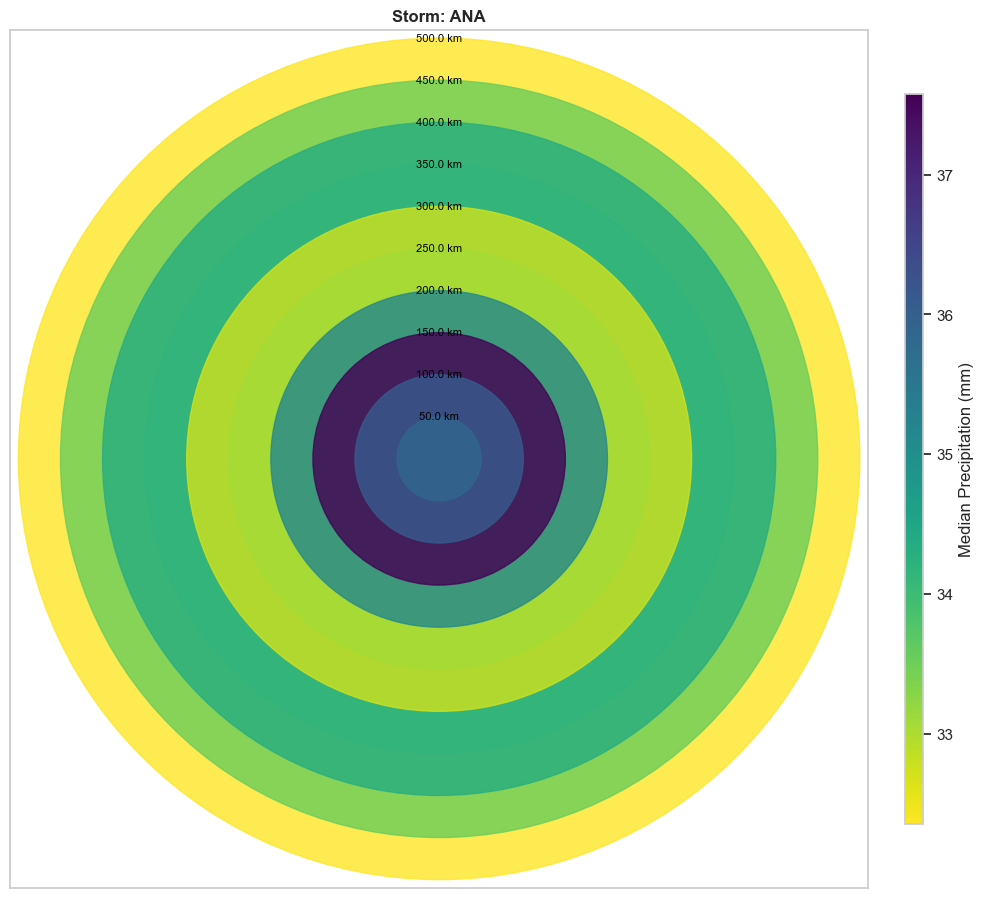

In [ ]:
selected_cyclone = "ANA"

# Filter for specific time steps and selected cyclone
df_time_steps = rain_df[
    (rain_df["time_step"].isin([-1, 0, 1]))
    & (rain_df["storm"] == selected_cyclone)
]

# Aggregate median rainfall values across time steps for the selected cyclone
df_aggregated = (
    df_time_steps.groupby(["radius"])["median_precip"]
    .mean()  # Compute average precipitation across all storms
    .reset_index()
)

# Set up the figure and axes
fig, ax = plt.subplots(
    figsize=(10, 10),
    subplot_kw={"aspect": "equal"},
)

# Define the viridis colormap and invert it
cmap = plt.get_cmap("viridis_r")  # Use the reversed colormap

# Find global min and max for the color bar
vmin = df_aggregated["median_precip"].min()
vmax = df_aggregated["median_precip"].max()
norm = Normalize(vmin=vmin, vmax=vmax)

# Create an axis for the plot
ax.set_aspect("equal")
ax.set_title(
    f"Storm: {selected_cyclone}",
    fontsize=12,
    fontweight="bold",
)

# Sort by radius in descending order to plot larger circles first
df_aggregated_sorted = df_aggregated.sort_values("radius", ascending=False)

# Plot each radius as a concentric circle, starting from the largest radius
for _, row in df_aggregated_sorted.iterrows():
    circle = plt.Circle(
        (0, 0),
        row["radius"],
        color=cmap(norm(row["median_precip"])),
        fill=True,
        alpha=0.8,  # Adjust alpha for better visibility
        edgecolor="none",
    )
    ax.add_artist(circle)

    # Add radius text
    ax.text(
        0,
        row["radius"],
        f'{row["radius"]} km',
        ha="center",
        va="center",
        fontsize=8,
        color="black",
    )

ax.set_xlim(
    -max(df_aggregated_sorted["radius"]) - 10,
    max(df_aggregated_sorted["radius"]) + 10,
)
ax.set_ylim(
    -max(df_aggregated_sorted["radius"]) - 10,
    max(df_aggregated_sorted["radius"]) + 10,
)
ax.set_xticks([])
ax.set_yticks([])

# Create colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(
    sm,
    ax=ax,
    orientation="vertical",
    fraction=0.02,
    pad=0.04,
    aspect=40,
)
cbar.set_label("Median Precipitation (mm)", fontsize=12)

# Adjust layout
plt.tight_layout()

plt.show()

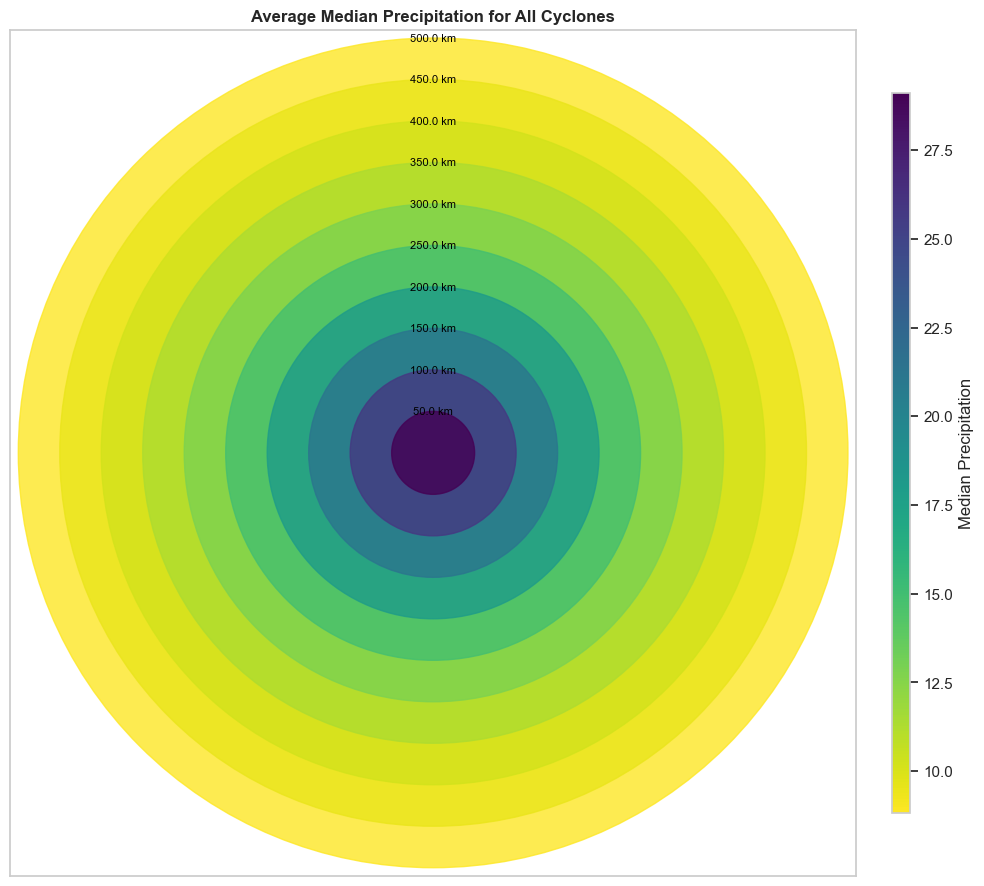

In [ ]:
# Filter for specific time steps
df_time_steps = rain_df[rain_df["time_step"].isin([-1, 0, 1])]

# Aggregate median rainfall values across time steps and storms
df_aggregated = (
    df_time_steps.groupby(["radius"])["median_precip"]
    .mean()  # Compute average precipitation across all storms
    .reset_index()
)

# Set up the figure and axes
fig, ax = plt.subplots(
    figsize=(10, 10),
    subplot_kw={"aspect": "equal"},
)

# Define the viridis colormap and invert it
cmap = plt.get_cmap("viridis_r")  # Use the reversed colormap

# Find global min and max for the color bar
vmin = df_aggregated["median_precip"].min()
vmax = df_aggregated["median_precip"].max()
norm = Normalize(vmin=vmin, vmax=vmax)

# Create an axis for the plot
ax.set_aspect("equal")
ax.set_title(
    "Average Median Precipitation for All Cyclones",
    fontsize=12,
    fontweight="bold",
)

# Sort by radius in descending order to plot larger circles first
df_aggregated_sorted = df_aggregated.sort_values("radius", ascending=False)

# Plot each radius as a concentric circle, starting from the largest radius
for _, row in df_aggregated_sorted.iterrows():
    circle = plt.Circle(
        (0, 0),
        row["radius"],
        color=cmap(norm(row["median_precip"])),
        fill=True,
        alpha=0.8,  # Adjust alpha for better visibility
        edgecolor="none",
    )
    ax.add_artist(circle)

    # Add radius text
    ax.text(
        0,
        row["radius"],
        f'{row["radius"]} km',
        ha="center",
        va="center",
        fontsize=8,
        color="black",
    )

ax.set_xlim(
    -max(df_aggregated_sorted["radius"]) - 10,
    max(df_aggregated_sorted["radius"]) + 10,
)
ax.set_ylim(
    -max(df_aggregated_sorted["radius"]) - 10,
    max(df_aggregated_sorted["radius"]) + 10,
)
ax.set_xticks([])
ax.set_yticks([])

# Create colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(
    sm,
    ax=ax,
    orientation="vertical",
    fraction=0.02,
    pad=0.04,
    aspect=40,
)
cbar.set_label("Median Precipitation", fontsize=12)

# Adjust layout
plt.tight_layout()

plt.show()

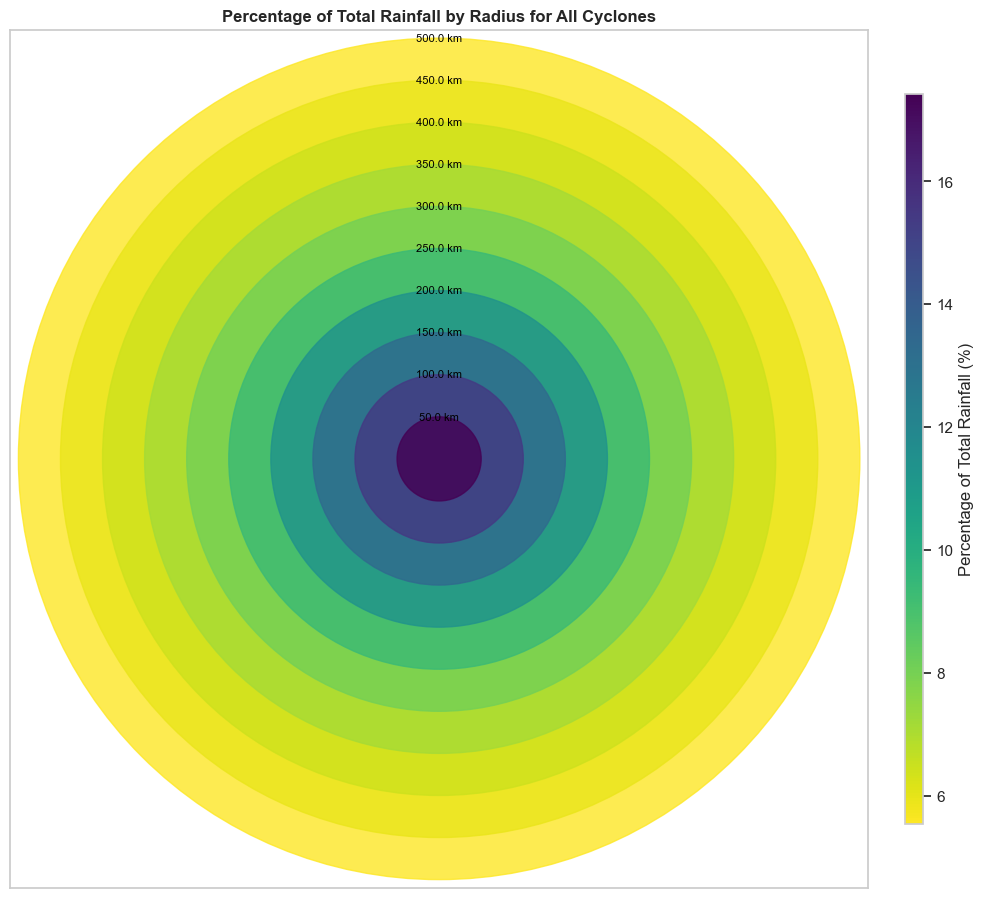

In [104]:
# Filter for specific time steps
df_time_steps = rain_df[rain_df["time_step"].isin([-1, 0, 1])]

# Aggregate median rainfall values across time steps and storms
df_aggregated = (
    df_time_steps.groupby(["radius"])["median_precip"]
    .sum()  # Compute total precipitation across all storms
    .reset_index()
)

# Calculate the percentage of total precipitation for each radius
total_precip = df_aggregated["median_precip"].sum()
df_aggregated["precip_pct"] = (
    df_aggregated["median_precip"] / total_precip
) * 100

# Set up the figure and axes
fig, ax = plt.subplots(
    figsize=(10, 10),
    subplot_kw={"aspect": "equal"},
)

# Define the viridis colormap and invert it
cmap = plt.get_cmap("viridis_r")  # Use the reversed colormap

# Find global min and max for the color bar (based on percentages)
vmin = df_aggregated["precip_pct"].min()
vmax = df_aggregated["precip_pct"].max()
norm = Normalize(vmin=vmin, vmax=vmax)

# Create an axis for the plot
ax.set_aspect("equal")
ax.set_title(
    "Percentage of Total Rainfall by Radius for All Cyclones",
    fontsize=12,
    fontweight="bold",
)

# Sort by radius in descending order to plot larger circles first
df_aggregated_sorted = df_aggregated.sort_values("radius", ascending=False)

# Plot each radius as a concentric circle, starting from the largest radius
for _, row in df_aggregated_sorted.iterrows():
    circle = plt.Circle(
        (0, 0),
        row["radius"],
        color=cmap(norm(row["precip_pct"])),
        fill=True,
        alpha=0.8,  # Adjust alpha for better visibility
        edgecolor="none",
    )
    ax.add_artist(circle)

    # Add radius text
    ax.text(
        0,
        row["radius"],
        f'{row["radius"]} km',
        ha="center",
        va="center",
        fontsize=8,
        color="black",
    )

ax.set_xlim(
    -max(df_aggregated_sorted["radius"]) - 10,
    max(df_aggregated_sorted["radius"]) + 10,
)
ax.set_ylim(
    -max(df_aggregated_sorted["radius"]) - 10,
    max(df_aggregated_sorted["radius"]) + 10,
)
ax.set_xticks([])
ax.set_yticks([])

# Create colorbar to show percentage
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(
    sm,
    ax=ax,
    orientation="vertical",
    fraction=0.02,
    pad=0.04,
    aspect=40,
)
cbar.set_label("Percentage of Total Rainfall (%)", fontsize=12)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

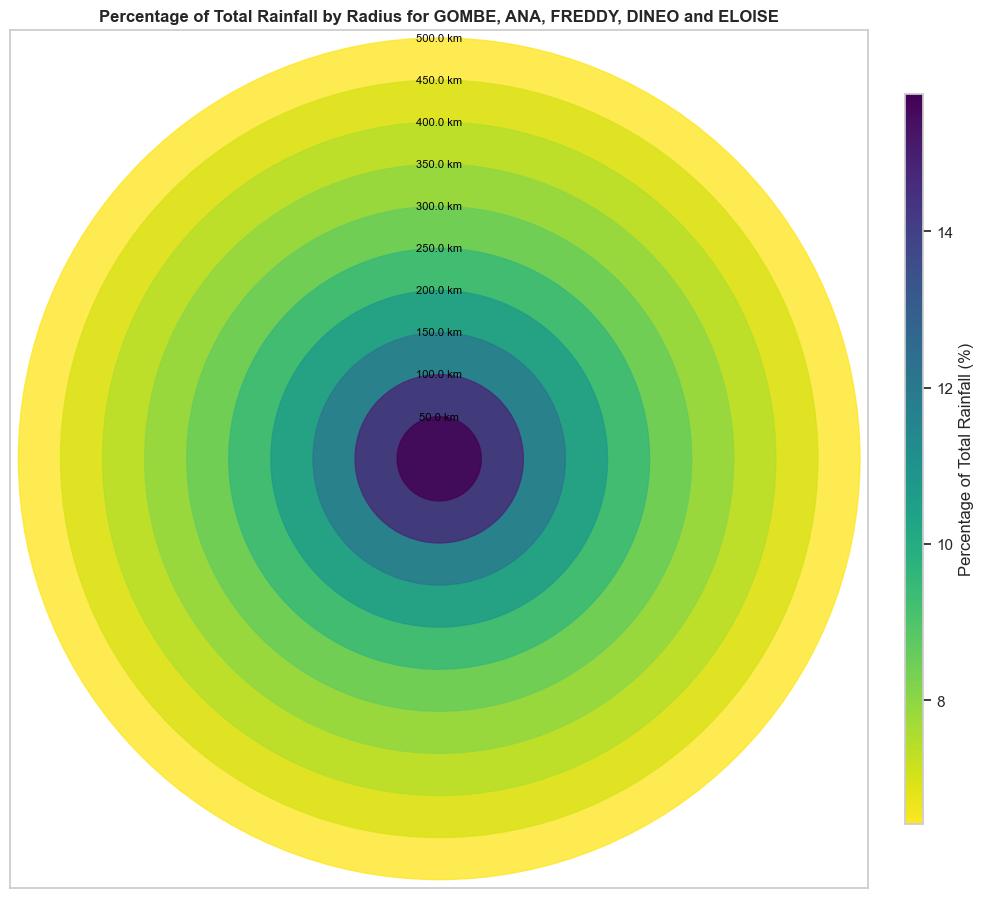

In [105]:
# Filter for specific time steps
df_time_steps = rain_df[
    (rain_df["time_step"].isin([-1, 0, 1]))
    & (rain_df["storm"].isin(["GOMBE", "ANA", "FREDDY", "DINEO", "ELOISE"]))
]

# Aggregate median rainfall values across time steps and storms
df_aggregated = (
    df_time_steps.groupby(["radius"])["median_precip"]
    .sum()  # Compute total precipitation across all storms
    .reset_index()
)

# Calculate the percentage of total precipitation for each radius
total_precip = df_aggregated["median_precip"].sum()
df_aggregated["precip_pct"] = (
    df_aggregated["median_precip"] / total_precip
) * 100

# Set up the figure and axes
fig, ax = plt.subplots(
    figsize=(10, 10),
    subplot_kw={"aspect": "equal"},
)

# Define the viridis colormap and invert it
cmap = plt.get_cmap("viridis_r")  # Use the reversed colormap

# Find global min and max for the color bar (based on percentages)
vmin = df_aggregated["precip_pct"].min()
vmax = df_aggregated["precip_pct"].max()
norm = Normalize(vmin=vmin, vmax=vmax)

# Create an axis for the plot
ax.set_aspect("equal")
ax.set_title(
    "Percentage of Total Rainfall by Radius for GOMBE, ANA, FREDDY, DINEO and ELOISE",
    fontsize=12,
    fontweight="bold",
)

# Sort by radius in descending order to plot larger circles first
df_aggregated_sorted = df_aggregated.sort_values("radius", ascending=False)

# Plot each radius as a concentric circle, starting from the largest radius
for _, row in df_aggregated_sorted.iterrows():
    circle = plt.Circle(
        (0, 0),
        row["radius"],
        color=cmap(norm(row["precip_pct"])),
        fill=True,
        alpha=0.8,  # Adjust alpha for better visibility
        edgecolor="none",
    )
    ax.add_artist(circle)

    # Add radius text
    ax.text(
        0,
        row["radius"],
        f'{row["radius"]} km',
        ha="center",
        va="center",
        fontsize=8,
        color="black",
    )

ax.set_xlim(
    -max(df_aggregated_sorted["radius"]) - 10,
    max(df_aggregated_sorted["radius"]) + 10,
)
ax.set_ylim(
    -max(df_aggregated_sorted["radius"]) - 10,
    max(df_aggregated_sorted["radius"]) + 10,
)
ax.set_xticks([])
ax.set_yticks([])

# Create colorbar to show percentage
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(
    sm,
    ax=ax,
    orientation="vertical",
    fraction=0.02,
    pad=0.04,
    aspect=40,
)
cbar.set_label("Percentage of Total Rainfall (%)", fontsize=12)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

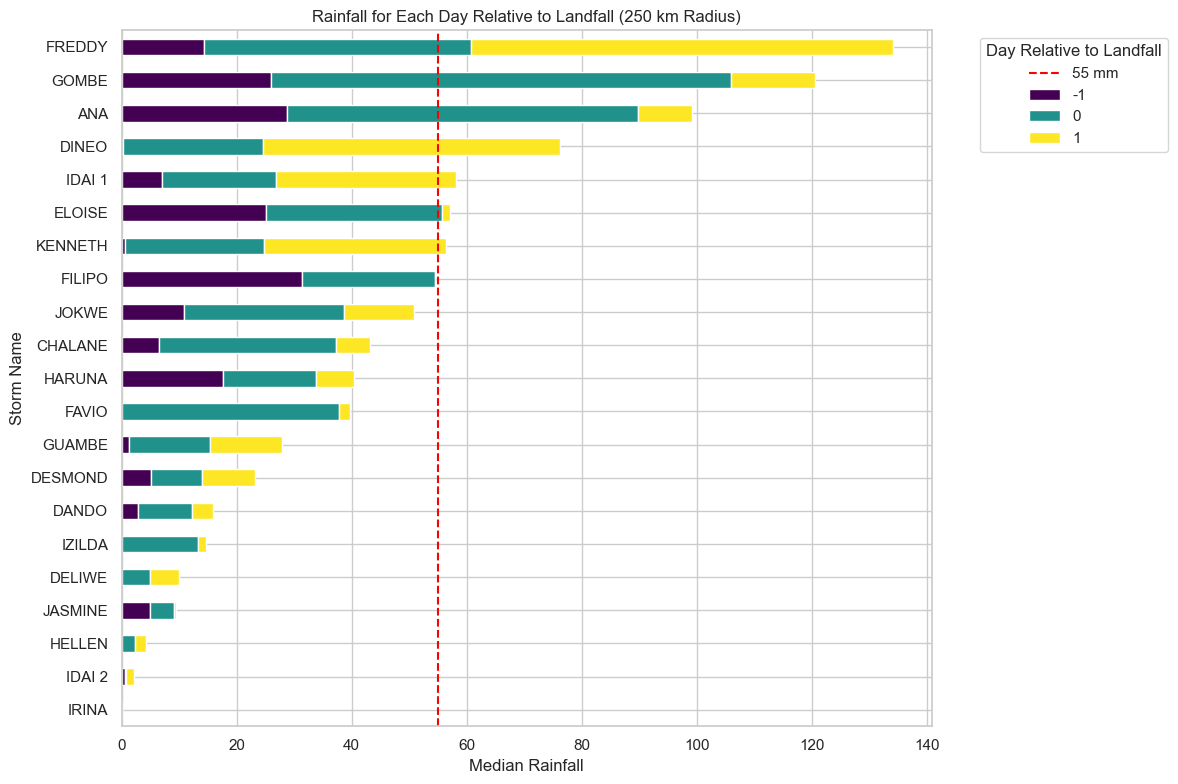

In [ ]:
# Filter for specific time steps
df_time_steps = rain_df[rain_df["time_step"].isin([-1, 0, 1])]
df_time_steps["time_step"] = df_time_steps["time_step"].astype(int)
# Filter for radius 250 km
df_filtered = df_time_steps[df_time_steps["radius"] == 250]

# Pivot the data for stacked bar plot
df_pivot = df_filtered.pivot_table(
    index="storm", columns="time_step", values="median_precip", aggfunc="mean"
)
df_pivot.fillna(0, inplace=True)  # Replace NaNs with 0 for missing values

# Calculate total rainfall per storm
df_pivot["total_rainfall"] = df_pivot.sum(axis=1)

# Sort by total rainfall
df_sorted = df_pivot.sort_values(by="total_rainfall", ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Stack bars
df_sorted.drop(columns="total_rainfall").plot(
    kind="barh", stacked=True, ax=ax, colormap="viridis"
)
ax.axvline(x=55, color="red", linestyle="--", label="55 mm")
# Labels and title
ax.set_xlabel("Median Rainfall")
ax.set_ylabel("Storm Name")
ax.set_title("Rainfall for Each Day Relative to Landfall (250 km Radius)")

# Invert y-axis to display the highest values at the top
ax.invert_yaxis()

# Add legend
ax.legend(
    title="Day Relative to Landfall",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
)

plt.tight_layout()
plt.show()

Setting a tentative threshold of 55mm would result in a 1-in-3 year return period for the rainfall trigger.

## INAM

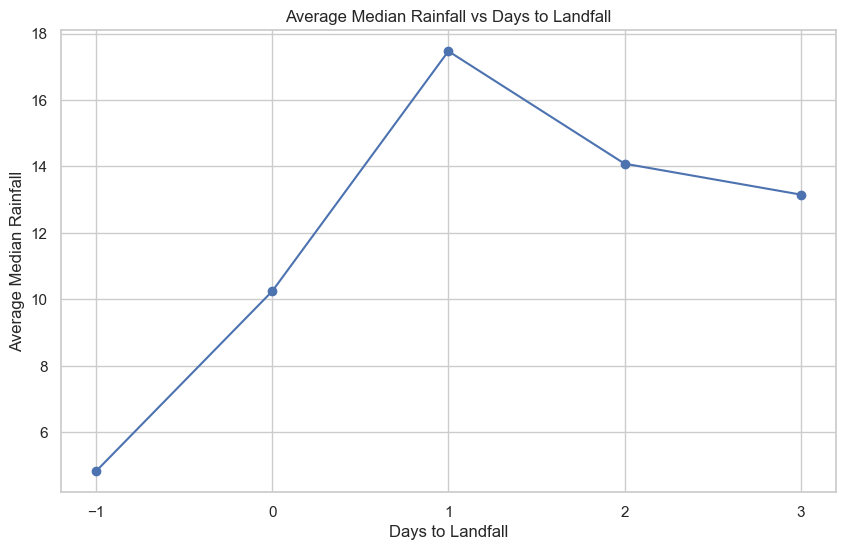

In [ ]:
# Group by 'days_to_landfall' and compute the mean of 'median_rainfall'
aggregated_df = inam_df.groupby("days_to_landfall", as_index=False).agg(
    {"median_rainfall": "mean"}
)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(
    aggregated_df["days_to_landfall"],
    aggregated_df["median_rainfall"],
    marker="o",
)

# Adding labels and title
plt.xlabel("Days to Landfall")
plt.ylabel("Average Median Rainfall")
plt.title("Average Median Rainfall vs Days to Landfall")
plt.grid(True)

# Ensure no decimals on the x-axis (Days to Landfall)
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.show()

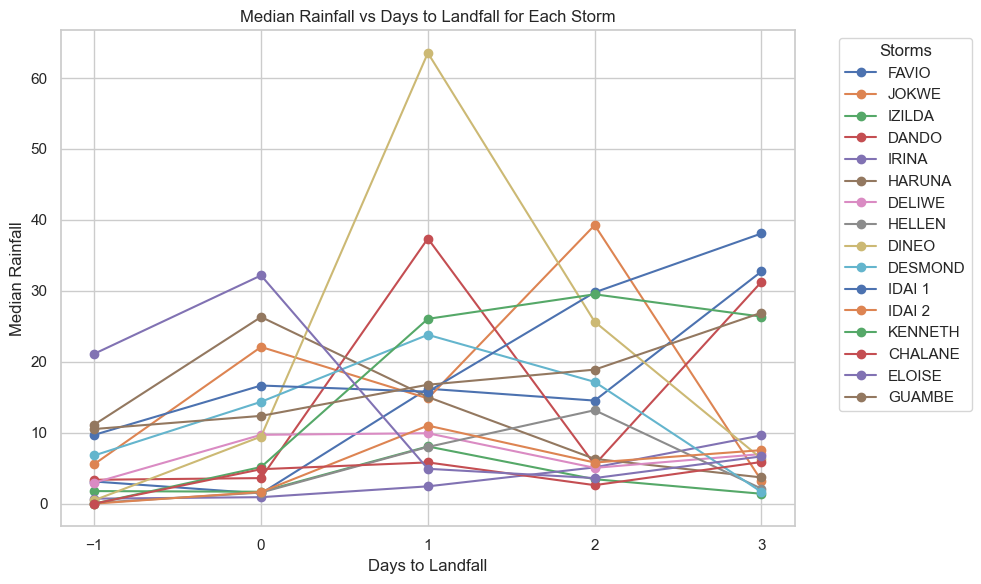

In [ ]:
# Get unique storm names
storms = inam_df["NAME"].unique()

# Plotting
plt.figure(figsize=(10, 6))

# Plot each storm's data individually
for storm in storms:
    storm_data = inam_df[inam_df["NAME"] == storm]
    plt.plot(
        storm_data["days_to_landfall"],
        storm_data["median_rainfall"],
        marker="o",
        label=storm,  # Use storm name as the label
    )

# Adding labels and title
plt.xlabel("Days to Landfall")
plt.ylabel("Median Rainfall")
plt.title("Median Rainfall vs Days to Landfall for Each Storm")
plt.grid(True)

# Add legend with storm names
plt.legend(title="Storms", bbox_to_anchor=(1.05, 1), loc="upper left")

# Ensure no decimals on the x-axis (Days to Landfall)
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.tight_layout()  # Adjust layout to fit the legend
plt.show()

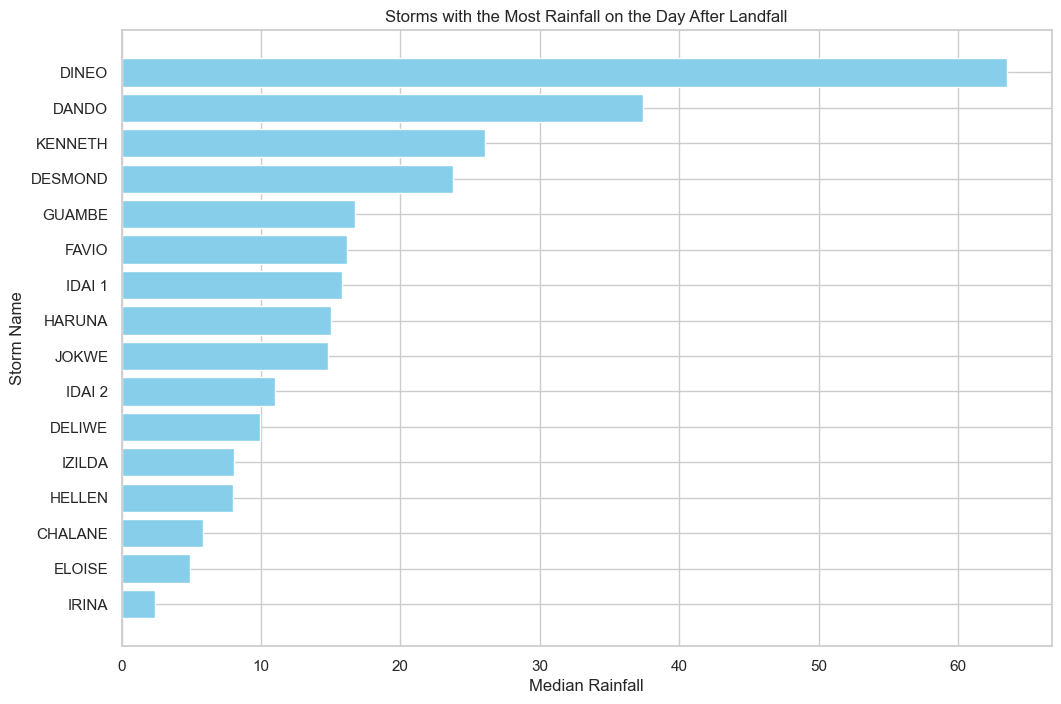

In [ ]:
# Filter for records on the day after landfall
day_after_landfall_df = inam_df[inam_df["days_to_landfall"] == 1]

# Aggregate by storm (NAME) to find the maximum rainfall on the day after landfall
max_rainfall_df = (
    day_after_landfall_df.groupby("NAME")
    .agg({"median_rainfall": "max"})
    .reset_index()
)

# Sort by rainfall in descending order to get storms with the most rainfall
sorted_max_rainfall_df = max_rainfall_df.sort_values(
    by="median_rainfall", ascending=False
)

# Plot the storms with the most rainfall on the day after landfall
plt.figure(figsize=(12, 8))
plt.barh(
    sorted_max_rainfall_df["NAME"],
    sorted_max_rainfall_df["median_rainfall"],
    color="skyblue",
)
plt.xlabel("Median Rainfall")
plt.ylabel("Storm Name")
plt.title("Storms with the Most Rainfall on the Day After Landfall")
plt.gca().invert_yaxis()  # To display the highest values at the top

plt.show()

In [110]:
inam_sum_df = (
    inam_df[inam_df["days_to_landfall"].isin([-1, 0, 1])]
    .groupby("NAME")["median_rainfall"]
    .sum()
    .reset_index()
)
inam_sum_df

,NAME,median_rainfall
0,CHALANE,10.6660
1,DANDO,44.3360
2,DELIWE,22.5790
3,DESMOND,44.9460
4,DINEO,73.4660
5,ELOISE,58.2075
6,FAVIO,20.7625
7,GUAMBE,39.6540
8,HARUNA,52.4775
9,HELLEN,9.6485


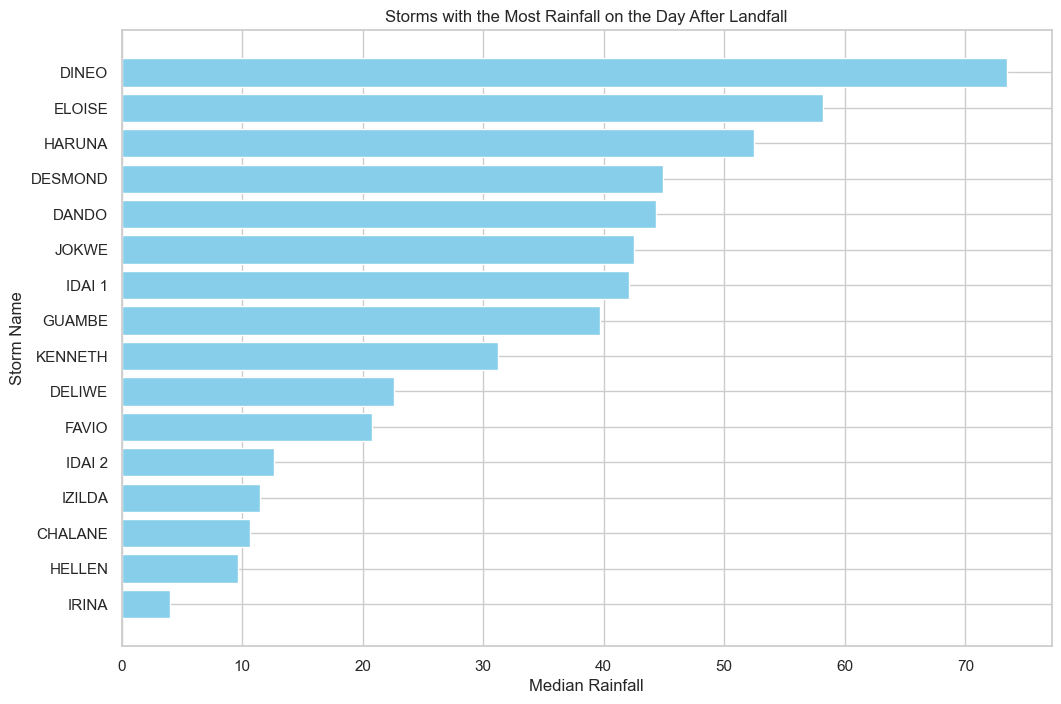

In [ ]:
# Aggregate by storm (NAME) to find the maximum rainfall on the day after landfall
max_rainfall_df = (
    inam_sum_df.groupby("NAME").agg({"median_rainfall": "max"}).reset_index()
)

# Sort by rainfall in descending order to get storms with the most rainfall
sorted_max_rainfall_df = max_rainfall_df.sort_values(
    by="median_rainfall", ascending=False
)

# Plot the storms with the most rainfall on the day after landfall
plt.figure(figsize=(12, 8))
plt.barh(
    sorted_max_rainfall_df["NAME"],
    sorted_max_rainfall_df["median_rainfall"],
    color="skyblue",
)
plt.xlabel("Median Rainfall")
plt.ylabel("Storm Name")
plt.title("Storms with the Most Rainfall on the Day After Landfall")
plt.gca().invert_yaxis()  # To display the highest values at the top

plt.show()

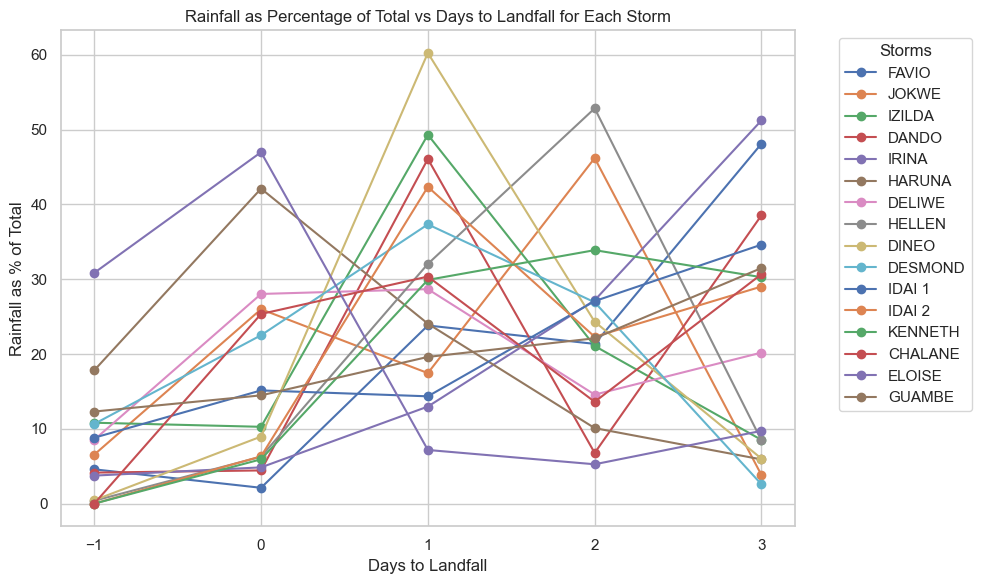

In [ ]:
# Get unique storm names
storms = inam_df["NAME"].unique()

# Plotting
plt.figure(figsize=(10, 6))

# Plot each storm's data individually as a percentage of the total rainfall
for storm in storms:
    storm_data = inam_df[inam_df["NAME"] == storm]

    # Calculate percentage of the total median rainfall for each day
    total_rainfall = storm_data["median_rainfall"].sum()
    storm_data["rainfall_percent"] = (
        storm_data["median_rainfall"] / total_rainfall
    ) * 100

    # Plot the percentage data
    plt.plot(
        storm_data["days_to_landfall"],
        storm_data["rainfall_percent"],
        marker="o",
        label=storm,  # Use storm name as the label
    )

# Adding labels and title
plt.xlabel("Days to Landfall")
plt.ylabel("Rainfall as % of Total")
plt.title("Rainfall as Percentage of Total vs Days to Landfall for Each Storm")
plt.grid(True)

# Add legend with storm names
plt.legend(title="Storms", bbox_to_anchor=(1.05, 1), loc="upper left")

# Ensure no decimals on the x-axis (Days to Landfall)
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.tight_layout()  # Adjust layout to fit the legend
plt.show()

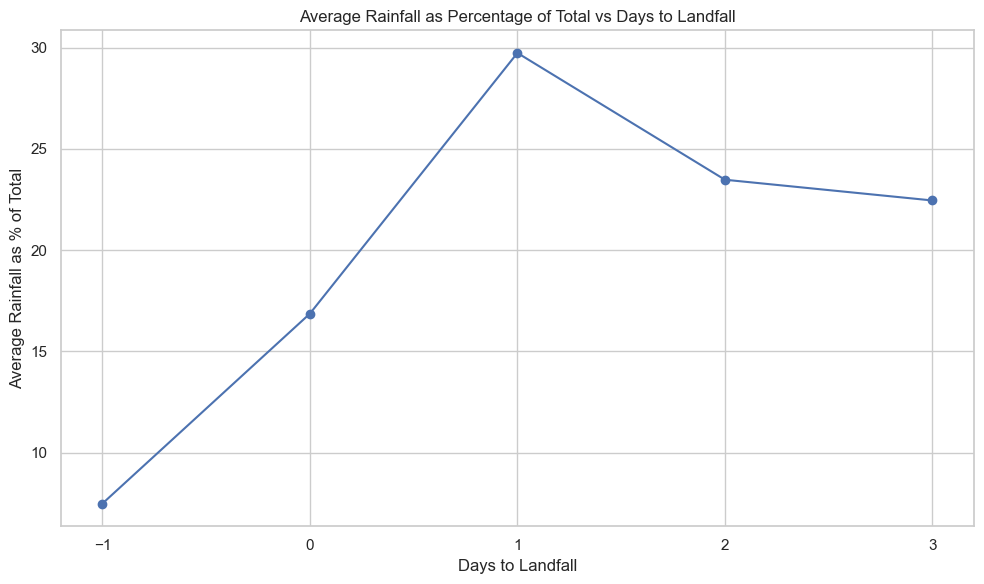

In [ ]:
# Step 1: Calculate the percentage of total rainfall for each storm
inam_df["rainfall_percent"] = inam_df.groupby("NAME")[
    "median_rainfall"
].transform(lambda x: (x / x.sum()) * 100)

# Step 2: Aggregate by 'days_to_landfall' and compute the mean of 'rainfall_percent' across storms
aggregated_df = inam_df.groupby("days_to_landfall", as_index=False).agg(
    {"rainfall_percent": "mean"}
)

# Step 3: Plotting the aggregated mean percentages
plt.figure(figsize=(10, 6))
plt.plot(
    aggregated_df["days_to_landfall"],
    aggregated_df["rainfall_percent"],
    marker="o",
)

# Adding labels and title
plt.xlabel("Days to Landfall")
plt.ylabel("Average Rainfall as % of Total")
plt.title("Average Rainfall as Percentage of Total vs Days to Landfall")
plt.grid(True)

# Ensure no decimals on the x-axis (Days to Landfall)
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.tight_layout()  # Adjust layout to fit the plot
plt.show()

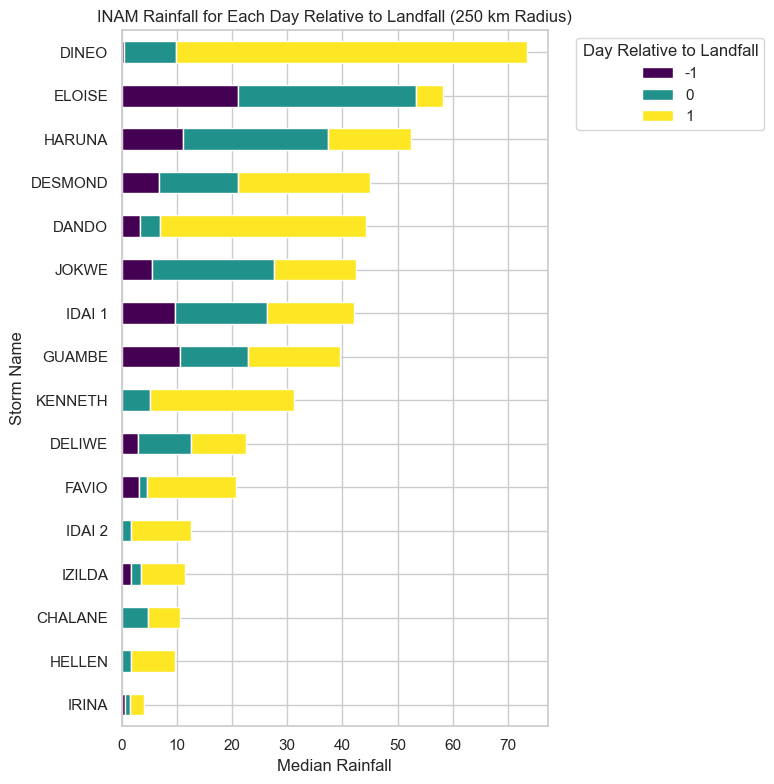

In [ ]:
# Filter for specific time steps
df_time_steps = inam_df[inam_df["days_to_landfall"].isin([-1, 0, 1])]
df_time_steps["time_step"] = df_time_steps["days_to_landfall"].astype(int)

# Pivot the data for stacked bar plot
df_pivot = df_time_steps.pivot_table(
    index="NAME",
    columns="time_step",
    values="median_rainfall",
    aggfunc="mean",
)
df_pivot.fillna(0, inplace=True)  # Replace NaNs with 0 for missing values

# Calculate total rainfall per storm
df_pivot["total_rainfall"] = df_pivot.sum(axis=1)

# Sort by total rainfall
df_sorted = df_pivot.sort_values(by="total_rainfall", ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(8, 8))

# Stack bars
df_sorted.drop(columns="total_rainfall").plot(
    kind="barh", stacked=True, ax=ax, colormap="viridis"
)
# Labels and title
ax.set_xlabel("Median Rainfall")
ax.set_ylabel("Storm Name")
ax.set_title("INAM Rainfall for Each Day Relative to Landfall (250 km Radius)")

# Invert y-axis to display the highest values at the top
ax.invert_yaxis()

# Add legend
ax.legend(
    title="Day Relative to Landfall",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
)

plt.tight_layout()
plt.show()

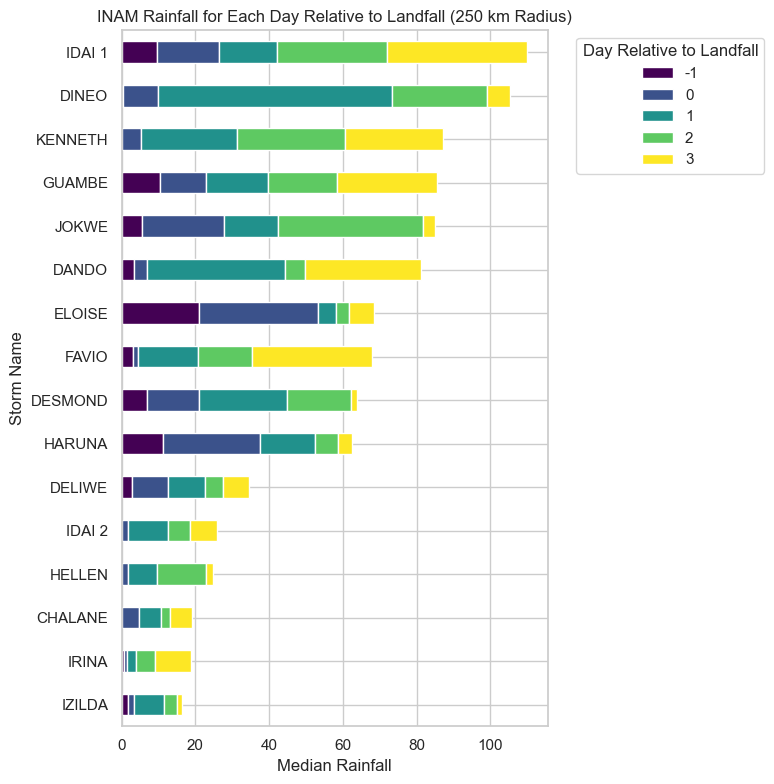

In [ ]:
# Filter for specific time steps
df_time_steps = inam_df[inam_df["days_to_landfall"].isin([-1, 0, 1, 2, 3])]
df_time_steps["time_step"] = df_time_steps["days_to_landfall"].astype(int)

# Pivot the data for stacked bar plot
df_pivot = df_time_steps.pivot_table(
    index="NAME",
    columns="time_step",
    values="median_rainfall",
    aggfunc="mean",
)
df_pivot.fillna(0, inplace=True)  # Replace NaNs with 0 for missing values

# Calculate total rainfall per storm
df_pivot["total_rainfall"] = df_pivot.sum(axis=1)

# Sort by total rainfall
df_sorted = df_pivot.sort_values(by="total_rainfall", ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(8, 8))

# Stack bars
df_sorted.drop(columns="total_rainfall").plot(
    kind="barh", stacked=True, ax=ax, colormap="viridis"
)
# Labels and title
ax.set_xlabel("Median Rainfall")
ax.set_ylabel("Storm Name")
ax.set_title("INAM Rainfall for Each Day Relative to Landfall (250 km Radius)")

# Invert y-axis to display the highest values at the top
ax.invert_yaxis()

# Add legend
ax.legend(
    title="Day Relative to Landfall",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
)

plt.tight_layout()
plt.show()

In [116]:
df_sorted

time_step,-1,0,1,2,3,total_rainfall
NAME,,,,,,
IDAI 1,9.6950,16.6505,15.7810,29.7830,38.0860,109.9955
DINEO,0.4800,9.4530,63.5330,25.6400,6.3390,105.4450
KENNETH,0.0000,5.1610,26.0490,29.5090,26.3610,87.0800
GUAMBE,10.5210,12.3700,16.7630,18.8895,26.9135,85.4570
JOKWE,5.5670,22.0880,14.8320,39.2590,3.2400,84.9860
DANDO,3.3640,3.6000,37.3720,5.4970,31.2690,81.1020
ELOISE,21.1240,32.1715,4.9120,3.6030,6.6610,68.4715
FAVIO,3.1200,1.4405,16.2020,14.5270,32.7340,68.0235
DESMOND,6.7920,14.3530,23.8010,17.1610,1.6440,63.7510


## IMERG against INAM

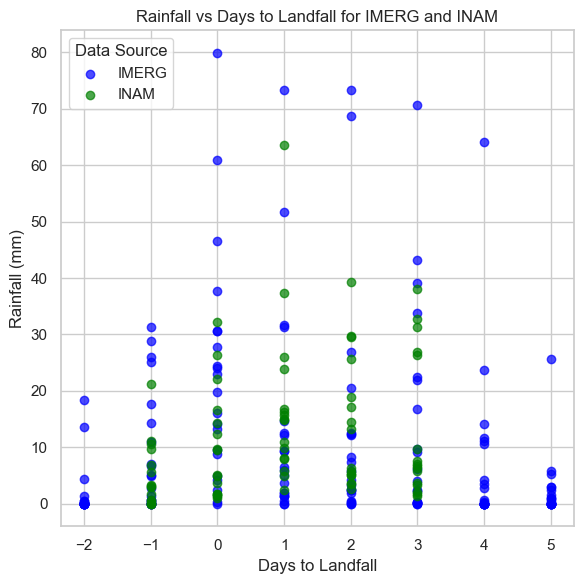

In [ ]:
# Plotting for IMERG (rain_df)
plt.figure(figsize=(6, 6))

# Color assignments
imerg_color = "blue"
inam_color = "green"
rain_df_250 = rain_df[rain_df["radius"] == 250]
# Plot each storm's data individually for rain_df (IMERG) using the same color
for storm in rain_df_250["storm"].unique():
    storm_data = rain_df_250[rain_df_250["storm"] == storm]
    plt.scatter(
        storm_data["time_step"],
        storm_data["median_precip"],
        color=imerg_color,
        label=(
            "IMERG" if storm == rain_df_250["storm"].unique()[0] else ""
        ),  # Label once
        alpha=0.7,  # Adding transparency for clarity
    )

# Plot each storm's data individually for output_df (INAM) using the same color
for storm in inam_df["NAME"].unique():
    storm_data = inam_df[inam_df["NAME"] == storm]
    plt.scatter(
        storm_data["days_to_landfall"],
        storm_data["median_rainfall"],
        color=inam_color,
        label=(
            "INAM" if storm == inam_df["NAME"].unique()[0] else ""
        ),  # Label once
        alpha=0.7,  # Adding transparency for clarity
    )

# Adding labels and title
plt.xlabel("Days to Landfall")
plt.ylabel("Rainfall (mm)")
plt.title("Rainfall vs Days to Landfall for IMERG and INAM")
plt.grid(True)

# Ensure no decimals on the x-axis (Days to Landfall)
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# Add legend with only two entries (IMERG and INAM)
plt.legend(title="Data Source", loc="upper left")

plt.tight_layout()  # Adjust layout to fit the legend
plt.show()

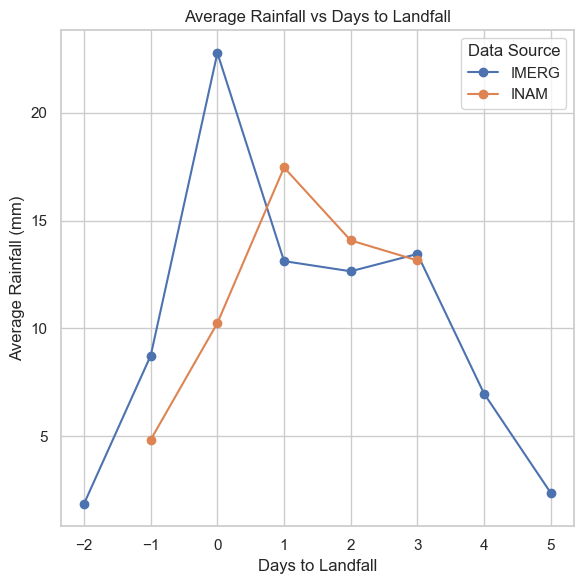

In [ ]:
# For the first DataFrame (rain_df)
# Aggregate by 'time_step' and compute the mean of 'median_precip'
aggregated_rain_df = rain_df_250.groupby("time_step", as_index=False).agg(
    {"median_precip": "mean"}
)

# Plotting the aggregated mean values for rain_df (IMERG)
plt.figure(figsize=(6, 6))
plt.plot(
    aggregated_rain_df["time_step"],
    aggregated_rain_df["median_precip"],
    marker="o",
    label="IMERG",
)

# For the second DataFrame (output_df)
# Aggregate by 'days_to_landfall' and compute the mean of 'median_rainfall'
aggregated_output_df = inam_df.groupby("days_to_landfall", as_index=False).agg(
    {"median_rainfall": "mean"}
)

# Plotting the aggregated mean values for output_df (INAM)
plt.plot(
    aggregated_output_df["days_to_landfall"],
    aggregated_output_df["median_rainfall"],
    marker="o",
    label="INAM",
)

# Adding labels and title
plt.xlabel("Days to Landfall")
plt.ylabel("Average Rainfall (mm)")
plt.title("Average Rainfall vs Days to Landfall")
plt.grid(True)

# Ensure no decimals on the x-axis (Days to Landfall)
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# Add legend
plt.legend(title="Data Source")

plt.tight_layout()  # Adjust layout to fit the plot
plt.show()

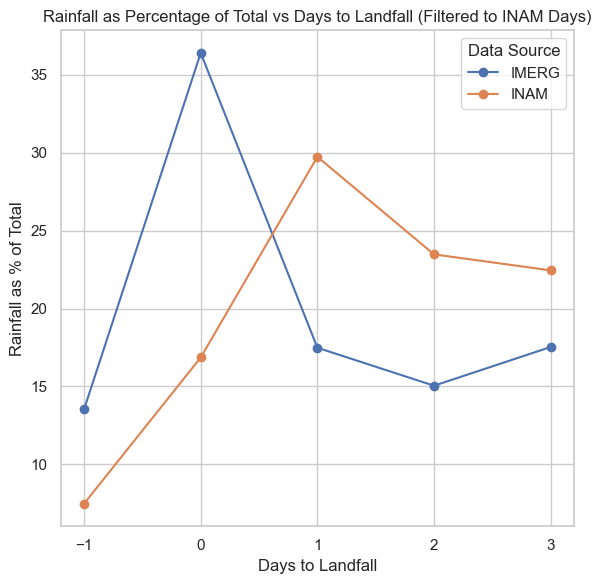

In [ ]:
# Step 1: Filter `rain_df` to only include the `time_step` values present in `output_df['days_to_landfall']`
matching_days = inam_df["days_to_landfall"].unique()
rain_df_filtered = rain_df_250[rain_df_250["time_step"].isin(matching_days)]

# Step 2: Calculate percentage of total rainfall for each dataset
rain_df_filtered["rainfall_percent"] = rain_df_filtered.groupby("storm")[
    "median_precip"
].transform(lambda x: (x / x.sum()) * 100)
inam_df["rainfall_percent"] = inam_df.groupby("NAME")[
    "median_rainfall"
].transform(lambda x: (x / x.sum()) * 100)

# Step 3: Aggregate by 'time_step' and 'days_to_landfall' to compute the mean of 'rainfall_percent'
aggregated_rain_df = rain_df_filtered.groupby("time_step", as_index=False).agg(
    {"rainfall_percent": "mean"}
)
aggregated_output_df = inam_df.groupby("days_to_landfall", as_index=False).agg(
    {"rainfall_percent": "mean"}
)

# Step 4: Plotting the aggregated percentages for both datasets
plt.figure(figsize=(6, 6))

# Plot for IMERG (rain_df)
plt.plot(
    aggregated_rain_df["time_step"],
    aggregated_rain_df["rainfall_percent"],
    marker="o",
    label="IMERG",
)

# Plot for INAM (output_df)
plt.plot(
    aggregated_output_df["days_to_landfall"],
    aggregated_output_df["rainfall_percent"],
    marker="o",
    label="INAM",
)

# Adding labels and title
plt.xlabel("Days to Landfall")
plt.ylabel("Rainfall as % of Total")
plt.title(
    "Rainfall as Percentage of Total vs Days to Landfall (Filtered to INAM Days)"
)
plt.grid(True)

# Ensure no decimals on the x-axis (Days to Landfall)
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# Add legend
plt.legend(title="Data Source")

plt.tight_layout()  # Adjust layout to fit the plot
plt.show()

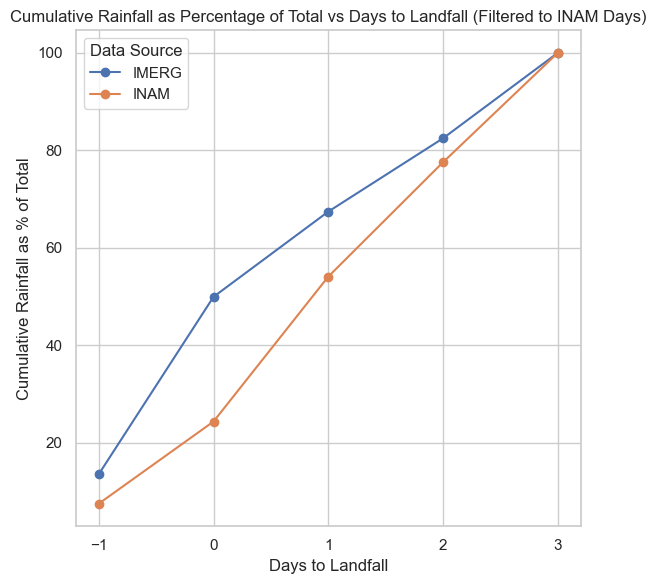

In [ ]:
# Step 1: Filter `rain_df` to only include the `time_step` values present in `output_df['days_to_landfall']`
matching_days = inam_df["days_to_landfall"].unique()
rain_df_filtered = rain_df_250[rain_df_250["time_step"].isin(matching_days)]

# Step 2: Calculate percentage of total rainfall for each dataset
rain_df_filtered["rainfall_percent"] = rain_df_filtered.groupby("storm")[
    "median_precip"
].transform(lambda x: (x / x.sum()) * 100)
inam_df["rainfall_percent"] = inam_df.groupby("NAME")[
    "median_rainfall"
].transform(lambda x: (x / x.sum()) * 100)

# Step 3: Aggregate by 'time_step' and 'days_to_landfall' to compute the mean of 'rainfall_percent'
aggregated_rain_df = rain_df_filtered.groupby("time_step", as_index=False).agg(
    {"rainfall_percent": "mean"}
)
aggregated_output_df = inam_df.groupby("days_to_landfall", as_index=False).agg(
    {"rainfall_percent": "mean"}
)

# Step 4: Calculate cumulative sum of the percentages
aggregated_rain_df["cumulative_rainfall_percent"] = aggregated_rain_df[
    "rainfall_percent"
].cumsum()
aggregated_output_df["cumulative_rainfall_percent"] = aggregated_output_df[
    "rainfall_percent"
].cumsum()

# Step 5: Plotting the cumulative percentages for both datasets
plt.figure(figsize=(6, 6))

# Plot for IMERG (rain_df)
plt.plot(
    aggregated_rain_df["time_step"],
    aggregated_rain_df["cumulative_rainfall_percent"],
    marker="o",
    label="IMERG",
)

# Plot for INAM (output_df)
plt.plot(
    aggregated_output_df["days_to_landfall"],
    aggregated_output_df["cumulative_rainfall_percent"],
    marker="o",
    label="INAM",
)

# Adding labels and title
plt.xlabel("Days to Landfall")
plt.ylabel("Cumulative Rainfall as % of Total")
plt.title(
    "Cumulative Rainfall as Percentage of Total vs Days to Landfall (Filtered to INAM Days)"
)
plt.grid(True)

# Ensure no decimals on the x-axis (Days to Landfall)
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# Add legend
plt.legend(title="Data Source")

plt.tight_layout()  # Adjust layout to fit the plot
plt.show()

In [154]:
# INAM
df_time_steps_inam = inam_df[inam_df["days_to_landfall"].isin([-1, 0, 1])]
df_time_steps_inam["time_step"] = df_time_steps_inam[
    "days_to_landfall"
].astype(int)

# Pivot the data for stacked bar plot
df_inam_pivot = df_time_steps_inam.pivot_table(
    index="NAME",
    columns="time_step",
    values="median_rainfall",
    aggfunc="mean",
)
df_inam_pivot.fillna(0, inplace=True)  # Replace NaNs with 0 for missing values

# Calculate total rainfall per storm
df_inam_pivot["total_rainfall"] = df_inam_pivot.sum(axis=1)
df_inam_pivot
# IMERG
df_time_steps_imerg = rain_df_250[(rain_df_250["time_step"].isin([-1, 0, 1]))]

# Ensure 'time_step' is an integer
df_time_steps_imerg["time_step"] = df_time_steps_imerg["time_step"].astype(int)
# Pivot the data for stacked bar plot
df_imerg_pivot = df_time_steps_imerg.pivot_table(
    index="storm",
    columns="time_step",
    values="median_precip",
    aggfunc="mean",
)
df_imerg_pivot.fillna(
    0, inplace=True
)  # Replace NaNs with 0 for missing values

# Calculate total rainfall per storm
df_imerg_pivot["total_rainfall"] = df_imerg_pivot.sum(axis=1)
df_imerg_pivot

time_step,-1,0,1,total_rainfall
storm,,,,
ANA,28.820677,60.963921,9.394053e+00,99.178651
CHALANE,6.601592,30.615360,5.988822e+00,43.205773
DANDO,2.826137,9.421268,3.677588e+00,15.924993
DELIWE,0.004790,4.917636,5.045880e+00,9.968307
DESMOND,5.092715,8.826616,9.258293e+00,23.177624
DINEO,0.210099,24.369291,5.162857e+01,76.207957
ELOISE,25.109930,30.624922,1.359175e+00,57.094027
FAVIO,0.084764,37.746681,1.817560e+00,39.649005
FILIPO,31.388107,23.035475,2.121124e-10,54.423582


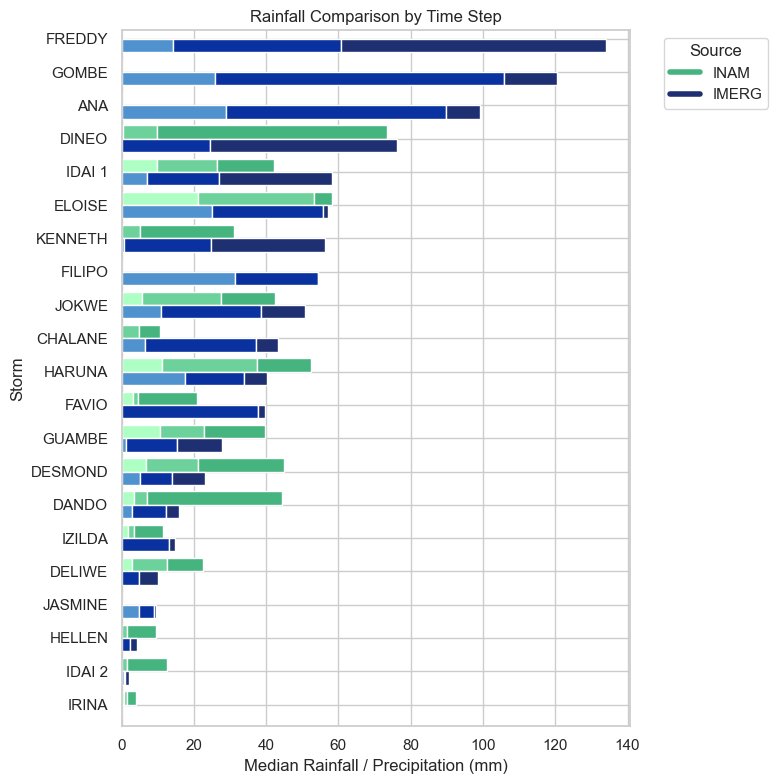

In [155]:
# Prepare INAM data
df_time_steps_inam = inam_df[inam_df["days_to_landfall"].isin([-1, 0, 1])]
df_time_steps_inam["time_step"] = df_time_steps_inam[
    "days_to_landfall"
].astype(int)
df_inam_pivot = df_time_steps_inam.pivot_table(
    index="NAME",
    columns="time_step",
    values="median_rainfall",
    aggfunc="mean",
)
df_inam_pivot.fillna(0, inplace=True)
df_inam_pivot["total_rainfall"] = df_inam_pivot.sum(axis=1)

# Prepare IMERG data
df_time_steps_imerg = rain_df_250[(rain_df_250["time_step"].isin([-1, 0, 1]))]
df_time_steps_imerg["time_step"] = df_time_steps_imerg["time_step"].astype(int)
df_imerg_pivot = df_time_steps_imerg.pivot_table(
    index="storm",
    columns="time_step",
    values="median_precip",
    aggfunc="mean",
)
df_imerg_pivot.fillna(0, inplace=True)
df_imerg_pivot["total_rainfall"] = df_imerg_pivot.sum(axis=1)

# Ensure both DataFrames have the same index
all_storms = df_inam_pivot.index.union(df_imerg_pivot.index)
df_inam_pivot = df_inam_pivot.reindex(all_storms, fill_value=0)
df_imerg_pivot = df_imerg_pivot.reindex(all_storms, fill_value=0)

# Combine data for plotting
df_combined = df_inam_pivot.add_suffix("_INAM").join(
    df_imerg_pivot.add_suffix("_IMERG")
)

# Sort by IMERG total_rainfall (highest values at the top)
df_combined_sorted = df_combined.sort_values(
    by="total_rainfall_IMERG", ascending=False
)

# Define color maps
colors_inam = ["#ADFFC3", "#6DD19C", "#46B47F"]  # Mint variations
colors_imerg = ["#5092CE", "#09319F", "#1E3072"]  # Sapphire variations

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot INAM data
df_inam_pivot.drop(columns="total_rainfall").loc[
    df_combined_sorted.index
].plot(
    kind="barh",
    stacked=True,
    width=0.4,
    ax=ax,
    color=colors_inam,
    label=[
        f"INAM {col}"
        for col in df_inam_pivot.drop(columns="total_rainfall").columns
    ],
    position=1,
)

# Plot IMERG data
df_imerg_pivot.drop(columns="total_rainfall").loc[
    df_combined_sorted.index
].plot(
    kind="barh",
    stacked=True,
    width=0.4,
    ax=ax,
    color=colors_imerg,
    label=[
        f"IMERG {col}"
        for col in df_imerg_pivot.drop(columns="total_rainfall").columns
    ],
    position=0,
)

# Add legend manually
handles = [
    plt.Line2D([0], [0], color=colors_inam[2], lw=4, label="INAM"),
    plt.Line2D([0], [0], color=colors_imerg[2], lw=4, label="IMERG"),
]
ax.legend(
    handles=handles,
    title="Source",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
)

# Formatting for the main plot
ax.set_title("Rainfall Comparison by Time Step")
ax.set_xlabel("Median Rainfall / Precipitation (mm)")
ax.set_ylabel("Storm")

# Ensure the highest values are at the top
ax.invert_yaxis()

plt.tight_layout()
plt.show()

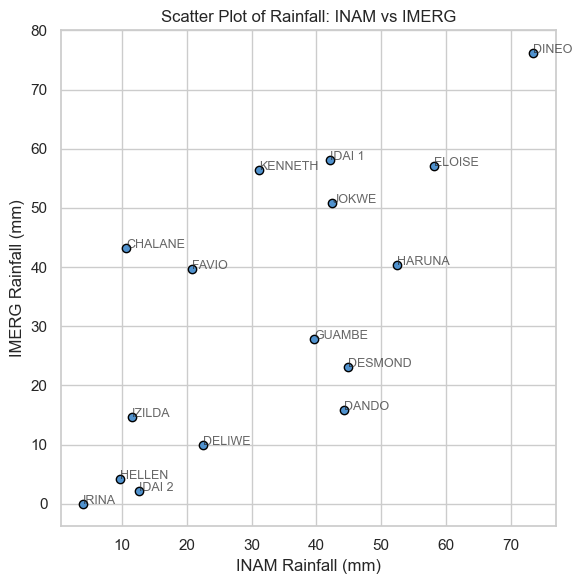

In [146]:
# Remove storms where INAM data is 0
non_zero_inam = df_inam_pivot["total_rainfall"] != 0
df_inam_pivot_filtered = df_inam_pivot[non_zero_inam]
df_imerg_pivot_filtered = df_imerg_pivot[non_zero_inam]
filtered_storms = df_inam_pivot_filtered.index

# Scatter plot data
inam_totals = df_inam_pivot_filtered["total_rainfall"]
imerg_totals = df_imerg_pivot_filtered["total_rainfall"]

# Create a scatter plot
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(inam_totals, imerg_totals, color="#5092CE", edgecolor="black")

# Add labels for storms
for i, storm in enumerate(filtered_storms):
    ax.annotate(
        storm, (inam_totals[i], imerg_totals[i]), fontsize=9, alpha=0.7
    )

# Formatting
ax.set_title("Scatter Plot of Rainfall: INAM vs IMERG")
ax.set_xlabel("INAM Rainfall (mm)")
ax.set_ylabel("IMERG Rainfall (mm)")

plt.tight_layout()
plt.show()

In [147]:
correlation_coefficient = np.corrcoef(inam_totals, imerg_totals)[0, 1]
correlation_coefficient

np.float64(0.7117252393227229)

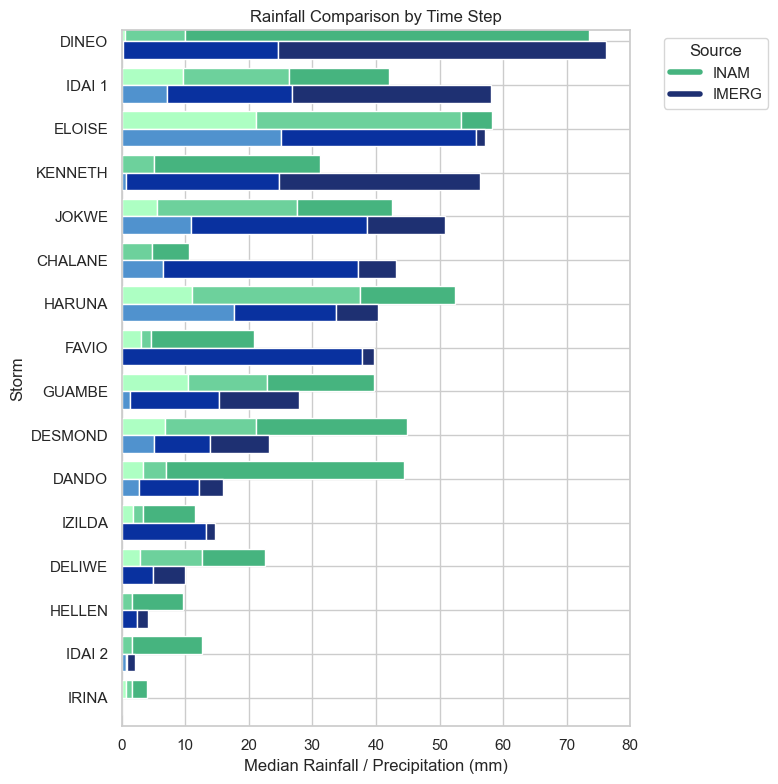

In [156]:
# Prepare INAM data
df_time_steps_inam = inam_df[inam_df["days_to_landfall"].isin([-1, 0, 1])]
df_time_steps_inam["time_step"] = df_time_steps_inam[
    "days_to_landfall"
].astype(int)
df_inam_pivot = df_time_steps_inam.pivot_table(
    index="NAME",
    columns="time_step",
    values="median_rainfall",
    aggfunc="mean",
)
df_inam_pivot.fillna(0, inplace=True)
df_inam_pivot["total_rainfall"] = df_inam_pivot.sum(axis=1)

# Prepare IMERG data
df_time_steps_imerg = rain_df_250[(rain_df_250["time_step"].isin([-1, 0, 1]))]
df_time_steps_imerg["time_step"] = df_time_steps_imerg["time_step"].astype(int)
df_imerg_pivot = df_time_steps_imerg.pivot_table(
    index="storm",
    columns="time_step",
    values="median_precip",
    aggfunc="mean",
)
df_imerg_pivot.fillna(0, inplace=True)
df_imerg_pivot["total_rainfall"] = df_imerg_pivot.sum(axis=1)

# Ensure both DataFrames have the same index
all_storms = df_inam_pivot.index.union(df_imerg_pivot.index)
df_inam_pivot = df_inam_pivot.reindex(all_storms, fill_value=0)
df_imerg_pivot = df_imerg_pivot.reindex(all_storms, fill_value=0)

# Remove storms where INAM total rainfall is 0
non_zero_inam = df_inam_pivot["total_rainfall"] != 0
df_inam_pivot_filtered = df_inam_pivot[non_zero_inam]
df_imerg_pivot_filtered = df_imerg_pivot[non_zero_inam]

# Combine data for plotting
df_combined_filtered = df_inam_pivot_filtered.add_suffix("_INAM").join(
    df_imerg_pivot_filtered.add_suffix("_IMERG")
)

# Sort by IMERG total rainfall (highest values at the top)
df_combined_sorted = df_combined_filtered.sort_values(
    by="total_rainfall_IMERG", ascending=False
)

# Define color maps
colors_inam = ["#ADFFC3", "#6DD19C", "#46B47F"]  # Mint variations
colors_imerg = ["#5092CE", "#09319F", "#1E3072"]  # Sapphire variations

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot INAM data
df_inam_pivot_filtered.drop(columns="total_rainfall").loc[
    df_combined_sorted.index
].plot(
    kind="barh",
    stacked=True,
    width=0.4,
    ax=ax,
    color=colors_inam,
    label=[
        f"INAM {col}"
        for col in df_inam_pivot_filtered.drop(
            columns="total_rainfall"
        ).columns
    ],
    position=1,
)

# Plot IMERG data
df_imerg_pivot_filtered.drop(columns="total_rainfall").loc[
    df_combined_sorted.index
].plot(
    kind="barh",
    stacked=True,
    width=0.4,
    ax=ax,
    color=colors_imerg,
    label=[
        f"IMERG {col}"
        for col in df_imerg_pivot_filtered.drop(
            columns="total_rainfall"
        ).columns
    ],
    position=0,
)

# Add legend manually
handles = [
    plt.Line2D([0], [0], color=colors_inam[2], lw=4, label="INAM"),
    plt.Line2D([0], [0], color=colors_imerg[2], lw=4, label="IMERG"),
]
ax.legend(
    handles=handles, title="Source", loc="upper left", bbox_to_anchor=(1.05, 1)
)

# Formatting for the main plot
ax.set_title("Rainfall Comparison by Time Step")
ax.set_xlabel("Median Rainfall / Precipitation (mm)")
ax.set_ylabel("Storm")

# Ensure the highest values are at the top
ax.invert_yaxis()

plt.tight_layout()
plt.show()

In [157]:
rain_df.columns

Index(['Unnamed: 0', 'storm', 'date', 'time_step', 'radius', 'median_precip',
       'rainfall_percent'],
      dtype='object')

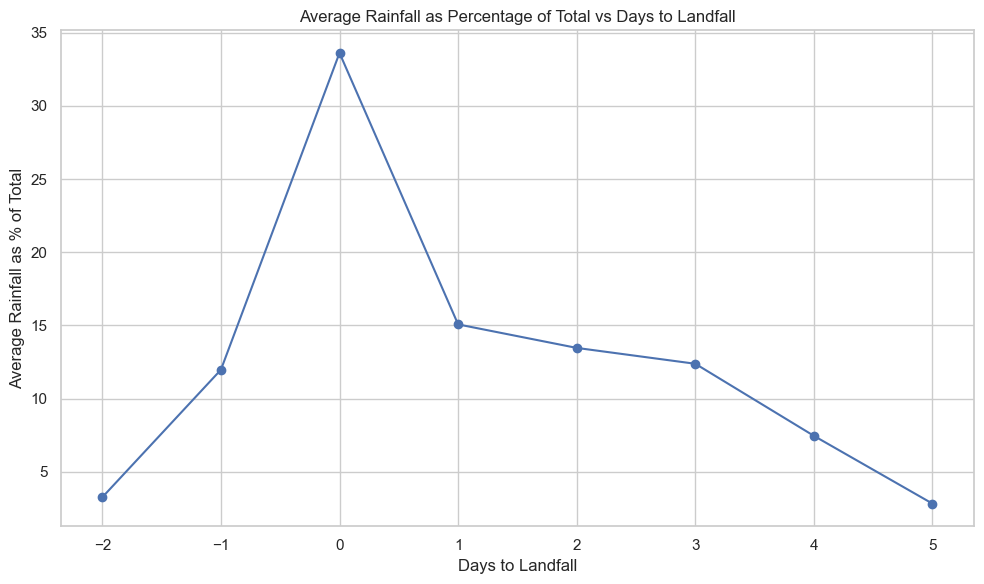

In [ ]:
# Step 1: Calculate the percentage of total rainfall for each storm
rain_df_250["rainfall_percent"] = rain_df_250.groupby("storm")[
    "median_precip"
].transform(lambda x: (x / x.sum()) * 100)

# Step 2: Aggregate by 'days_to_landfall' and compute the mean of 'rainfall_percent' across storms
aggregated_df = rain_df_250.groupby("time_step", as_index=False).agg(
    {"rainfall_percent": "mean"}
)

# Step 3: Plotting the aggregated mean percentages
plt.figure(figsize=(10, 6))
plt.plot(
    aggregated_df["time_step"],
    aggregated_df["rainfall_percent"],
    marker="o",
)

# Adding labels and title
plt.xlabel("Days to Landfall")
plt.ylabel("Average Rainfall as % of Total")
plt.title("Average Rainfall as Percentage of Total vs Days to Landfall")
plt.grid(True)

# Ensure no decimals on the x-axis (Days to Landfall)
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.tight_layout()  # Adjust layout to fit the plot
plt.show()

In [160]:
rain_df

,Unnamed: 0,storm,date,time_step,radius,median_precip,rainfall_percent
0,0,FAVIO,20/02/2007 10:00,-2,50,0.602754,0.099697
1,1,FAVIO,20/02/2007 10:00,-2,100,0.307900,0.050927
2,2,FAVIO,20/02/2007 10:00,-2,150,0.072822,0.012045
3,3,FAVIO,20/02/2007 10:00,-2,200,0.004476,0.000740
4,4,FAVIO,20/02/2007 10:00,-2,250,0.000000,0.000000
...,...,...,...,...,...,...,...
1675,1675,FILIPO,17/03/2024 05:00,5,300,0.589248,0.067266
1676,1676,FILIPO,17/03/2024 05:00,5,350,0.306609,0.035001
1677,1677,FILIPO,17/03/2024 05:00,5,400,0.260966,0.029791
1678,1678,FILIPO,17/03/2024 05:00,5,450,0.260798,0.029771


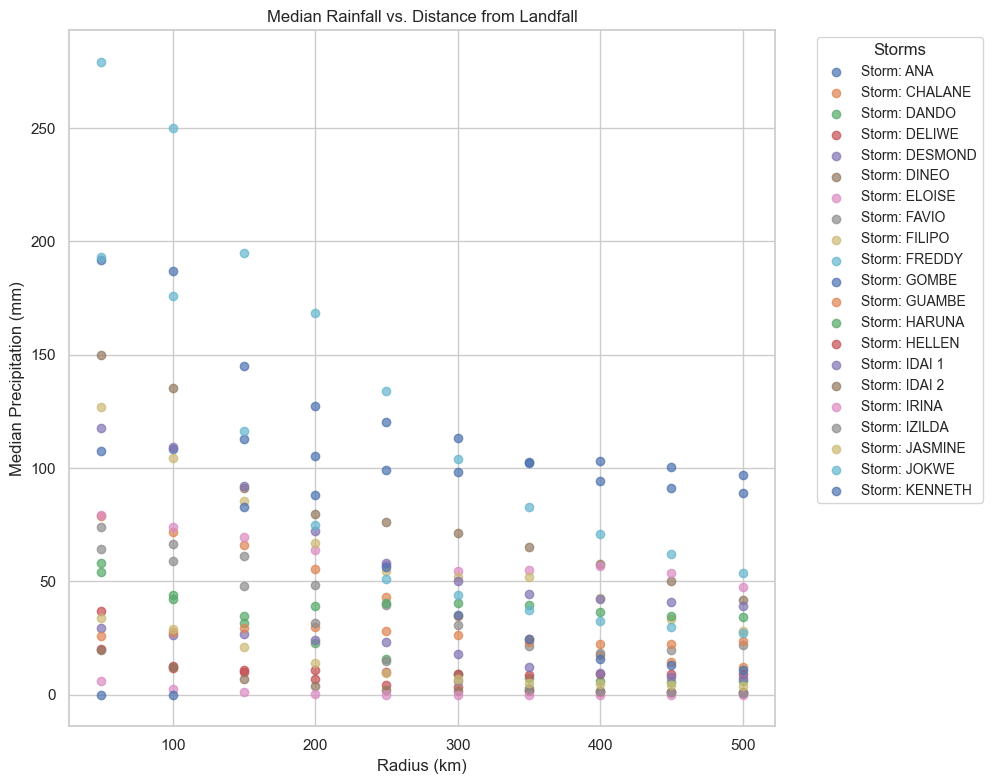

In [ ]:
# Aggregate median rainfall values across time steps by radius and storm
df_time_steps = rain_df[rain_df["time_step"].isin([-1, 0, 1])]

df_aggregated = (
    df_time_steps.groupby(["storm", "radius"])["median_precip"]
    .sum()
    .reset_index()
)

# List of unique storms
storms = df_aggregated["storm"].unique()

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Define a colormap for better distinction
cmap = plt.get_cmap("viridis")

# Plot data for each storm
for storm in storms:
    df_storm = df_aggregated[df_aggregated["storm"] == storm]

    # Scatter plot for each storm
    scatter = ax.scatter(
        df_storm["radius"],
        df_storm["median_precip"],
        label=f"Storm: {storm}",
        alpha=0.7,
    )

# Add labels and title
ax.set_xlabel("Radius (km)")
ax.set_ylabel("Median Precipitation (mm)")
ax.set_title("Median Rainfall vs. Distance from Landfall")

# Create a legend outside the plot
ax.legend(
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    title="Storms",
    fontsize="small",
)

# Add grid
ax.grid(True)

# Adjust layout to make room for the legend
plt.tight_layout(
    rect=[0, 0, 0.85, 1]
)  # Adjust rect to make space for the legend

plt.show()

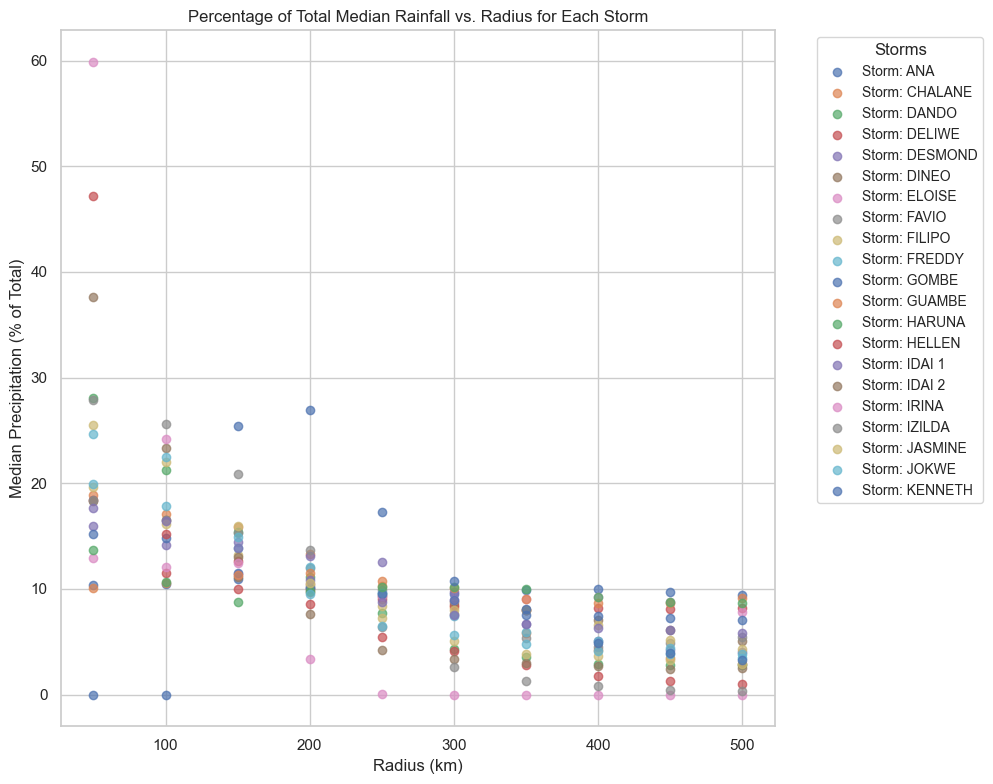

In [ ]:
df_time_steps = rain_df[rain_df["time_step"].isin([-1, 0, 1])]

# Aggregate median rainfall values across time steps by radius and storm
df_aggregated = (
    df_time_steps.groupby(["storm", "radius"])["median_precip"]
    .sum()
    .reset_index()
)

# List of unique storms
storms = df_aggregated["storm"].unique()

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Define a colormap for better distinction
cmap = plt.get_cmap("viridis")

# Plot data for each storm
for storm in storms:
    df_storm = df_aggregated[df_aggregated["storm"] == storm]

    # Calculate percentage of total median precipitation
    df_storm["median_precip_pct"] = (
        df_storm["median_precip"] / df_storm["median_precip"].sum()
    ) * 100

    # Scatter plot for each storm, keeping radius as is
    scatter = ax.scatter(
        df_storm["radius"],
        df_storm["median_precip_pct"],
        label=f"Storm: {storm}",
        alpha=0.7,
        cmap=cmap,
    )

# Add labels and title
ax.set_xlabel("Radius (km)")
ax.set_ylabel("Median Precipitation (% of Total)")
ax.set_title("Percentage of Total Median Rainfall vs. Radius for Each Storm")

# Create a legend outside the plot
ax.legend(
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    title="Storms",
    fontsize="small",
)

# Add grid
ax.grid(True)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

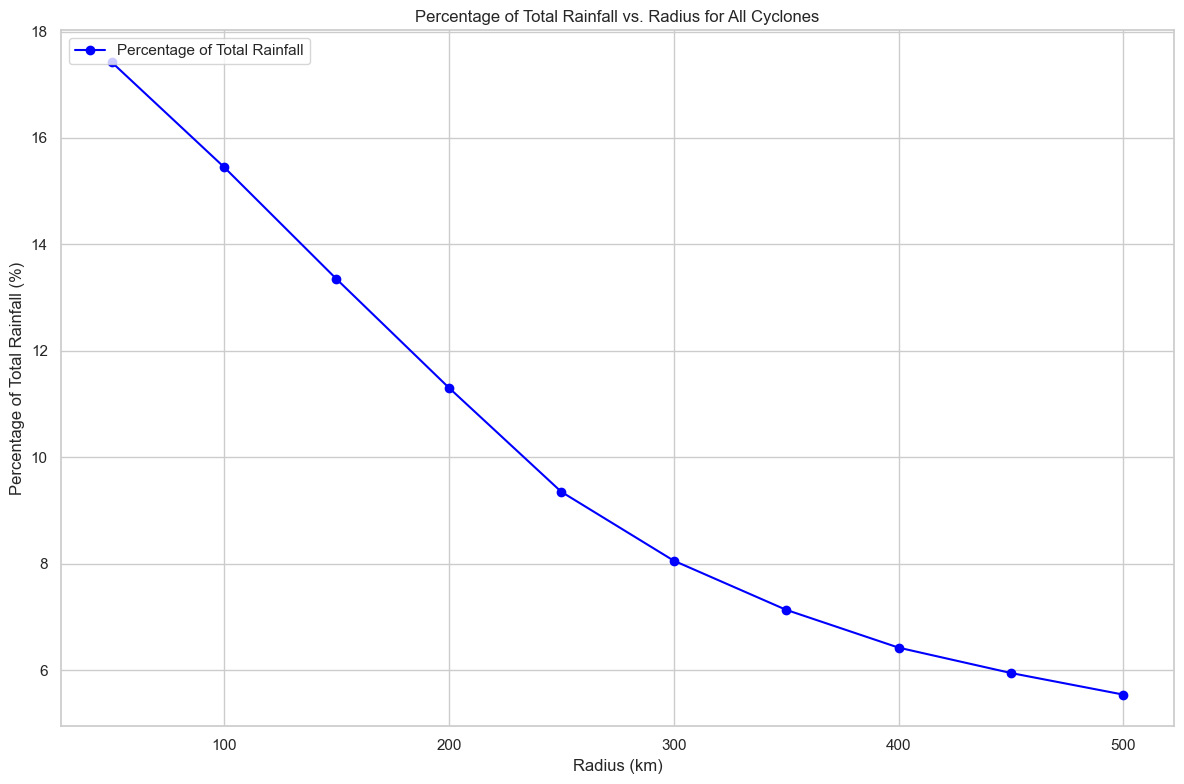

In [ ]:
df_time_steps = rain_df[rain_df["time_step"].isin([-1, 0, 1])]

# Aggregate median rainfall values across time steps by radius and storm
df_aggregated = (
    df_time_steps.groupby(["storm", "radius"])["median_precip"]
    .sum()
    .reset_index()
)

# Calculate total precipitation for all storms
total_precipitation = df_aggregated["median_precip"].sum()

# Calculate percentage of total median precipitation by radius
df_aggregated["median_precip_pct"] = (
    df_aggregated.groupby("radius")["median_precip"].transform(sum)
    / total_precipitation
) * 100

# Group by radius to get the average percentage precipitation
df_percentage = (
    df_aggregated.groupby("radius")["median_precip_pct"].mean().reset_index()
)

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Plot percentage precipitation by radius
ax.plot(
    df_percentage["radius"],
    df_percentage["median_precip_pct"],
    marker="o",
    color="blue",
    label="Percentage of Total Rainfall",
    linestyle="-",
)

# Add labels and title
ax.set_xlabel("Radius (km)")
ax.set_ylabel("Percentage of Total Rainfall (%)")
ax.set_title("Percentage of Total Rainfall vs. Radius for All Cyclones")

# Add grid
ax.grid(True)

# Add a legend
ax.legend(loc="upper left")

plt.tight_layout()
plt.show()

In [164]:
# Filter and sort the DataFrame
df_ordered = rain_df[
    (rain_df["radius"] == 250) & (rain_df["time_step"] == 1)
].sort_values(by="median_precip", ascending=False)

# Display the sorted DataFrame
df_ordered

,Unnamed: 0,storm,date,time_step,radius,median_precip,rainfall_percent
1554,1554,FREDDY,12/03/2023 17:30,1,250,7.337149e+01,3.127357e+00
674,674,DINEO,16/02/2017 17:30,1,250,5.162857e+01,6.009276e+00
994,994,KENNETH,26/04/2019 15:00,1,250,3.173984e+01,2.585991e+00
834,834,IDAI 1,05/03/2019 12:30,1,250,3.125345e+01,2.025841e+00
1394,1394,GOMBE,12/03/2022 00:30,1,250,1.457531e+01,8.859363e-01
1234,1234,GUAMBE,13/02/2021 02:30,1,250,1.256978e+01,1.550951e+00
114,114,JOKWE,09/03/2008 14:30,1,250,1.218832e+01,1.120889e+00
1314,1314,ANA,25/01/2022 08:00,1,250,9.394053e+00,7.655429e-01
754,754,DESMOND,22/01/2019 21:30,1,250,9.258293e+00,1.787880e+00
434,434,HARUNA,17/02/2013 12:00,1,250,6.558484e+00,9.974650e-01


In [165]:
inam_data

,Unnamed: 0,NAME,date,days_to_landfall,median_rainfall
2,2,FAVIO,2007-02-23,1,16.2020
7,7,JOKWE,2008-03-09,1,14.8320
12,12,IZILDA,2009-03-30,1,8.0600
17,17,DANDO,2012-01-17,1,37.3720
22,22,IRINA,2012-03-12,1,2.4380
27,27,HARUNA,2013-02-17,1,15.0305
32,32,DELIWE,2014-01-23,1,9.9250
37,37,HELLEN,2014-04-05,1,7.9890
42,42,DINEO,2017-02-16,1,63.5330
47,47,DESMOND,2019-01-22,1,23.8010


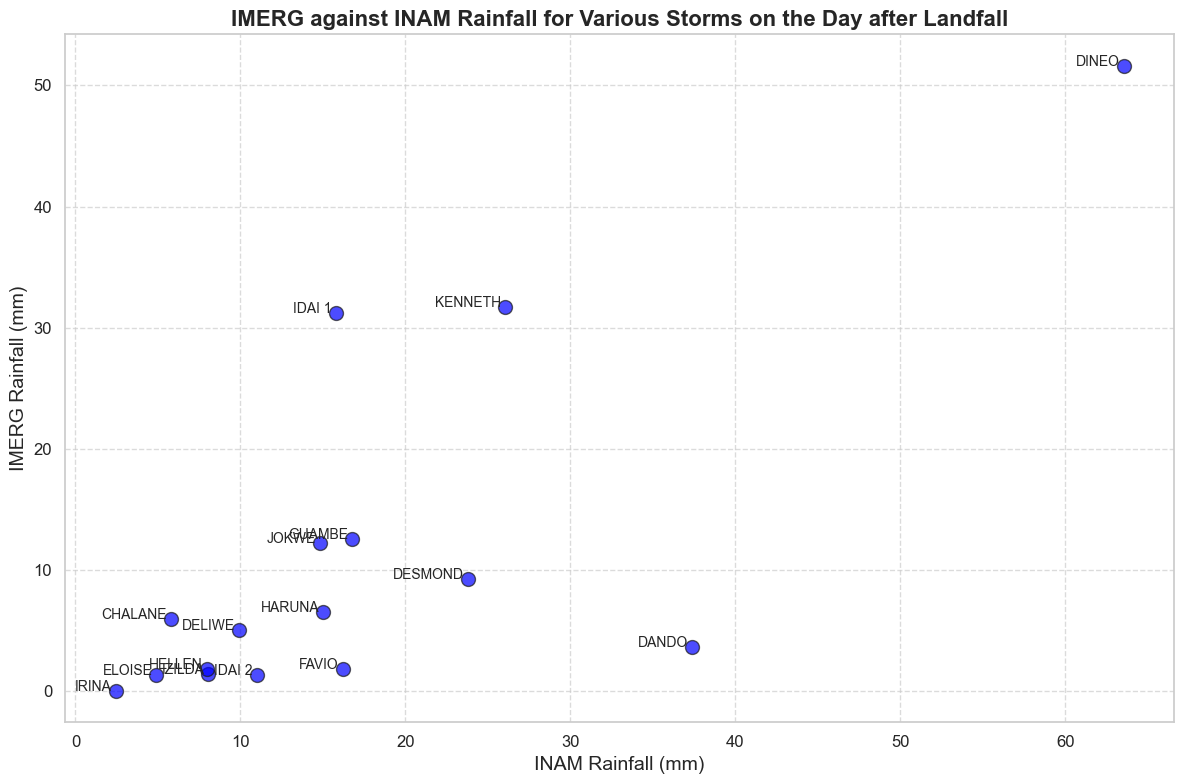

In [ ]:
imerg_data = rain_df[(rain_df["radius"] == 250) & (rain_df["time_step"] == 1)]
imerg_data["storm"] = imerg_data.apply(
    lambda x: (
        f"{x['storm']} {imerg_data[imerg_data['storm'] == 'IDAI'].groupby('storm').cumcount().add(1)[x.name]}"
        if x["storm"] == "IDAI"
        else x["storm"]
    ),
    axis=1,
)
# Create DataFrames
df1 = pd.DataFrame(inam_data)

# Merge data on storm names
df = pd.merge(df1, imerg_data, left_on="NAME", right_on="storm", how="inner")

# Set up the plot with Seaborn
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Scatter plot with annotations
plt.scatter(
    df["median_rainfall"],
    df["median_precip"],
    color="blue",
    s=100,
    alpha=0.7,
    edgecolors="k",
)

# Annotate each point with the storm name
for i, row in df.iterrows():
    plt.text(
        row["median_rainfall"] - 0.25,
        row["median_precip"],
        row["storm"],
        fontsize=10,
        ha="right",
    )

# Customizing the plot
plt.title(
    "IMERG against INAM Rainfall for Various Storms on the Day after Landfall",
    fontsize=16,
    fontweight="bold",
)
plt.xlabel("INAM Rainfall (mm)", fontsize=14)
plt.ylabel("IMERG Rainfall (mm)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

In [167]:
inam_sum_df = (
    inam_df[inam_df["days_to_landfall"].isin([-1, 0, 1])]
    .groupby("NAME")["median_rainfall"]
    .sum()
    .reset_index()
)

In [ ]:
# Lists of storm events
inam_storms = inam_data[(inam_df["median_rainfall"] > 16.5)]["NAME"].unique()
imerg_storms = (
    pd.Series(imerg_data[imerg_data["median_precip"] > 14]["storm"].unique())
    .replace("IDAI 1", "IDAI")
    .to_list()
)
# obs_ws_storms = ["DINEO", "IDAI", "ELOISE", "FREDDY", "FILIPO"]
# obs_rain_storms = ["FAVIO", "ANA", "GOMBE", "FREDDY"]

df = storm_df.copy()
# Add the new columns for INAM and IMERG observation rain
df["INAM OBS RAIN"] = df["storm"].apply(lambda x: x in inam_storms)
df["IMERG OBS RAIN"] = df["storm"].apply(lambda x: x in imerg_storms)
df = df[
    [
        "storm",
        "INAM OBS RAIN",
        "IMERG OBS RAIN",
        "Total Affected",
        "CERF Allocations (USD)",
    ]
]
# Sort the DataFrame by 'Total Affected' in descending order
# Round values in 'Total Affected' and 'CERF Allocations' columns
df_sorted = df.sort_values(by="Total Affected", ascending=False)


# Apply styling
styled_df = (
    df_sorted.style.map(
        highlight_true,
        subset=[
            "INAM OBS RAIN",
            "IMERG OBS RAIN",
            # "Observational Rainfall",
        ],
    )
    .map(color_bar_affected, subset=["Total Affected"])
    .map(color_bar_cerf, subset=["CERF Allocations (USD)"])
    .format(
        {
            "Total Affected": lambda x: (
                f"{int(x):,}" if pd.notna(x) else ""
            ),  # Format with commas, no decimals, NaN as blank
            "CERF Allocations (USD)": lambda x: (
                f"{int(x):,}" if pd.notna(x) else ""
            ),  # Format with commas, no decimals, NaN as blank
        }
    )
    .set_table_styles(
        {"": [{"selector": "table", "props": "background-color: white;"}]}
    )
)

# Display the styled DataFrame
styled_df

,storm,INAM OBS RAIN,IMERG OBS RAIN,Total Affected,CERF Allocations (USD)
12,IDAI,False,True,"1,628,167","14,018,121"
20,FREDDY,False,True,"1,143,569","9,995,213"
10,DINEO,True,True,"750,102","2,000,095"
18,GOMBE,False,True,"736,015","4,018,682"
15,ELOISE,False,False,"481,901",
13,KENNETH,True,True,"400,094","9,964,907"
1,JOKWE,False,False,"220,013","548,913"
17,ANA,False,False,"185,429",
0,FAVIO,False,False,"162,770","1,070,014"
14,CHALANE,False,False,"73,254",


## CHIRPS

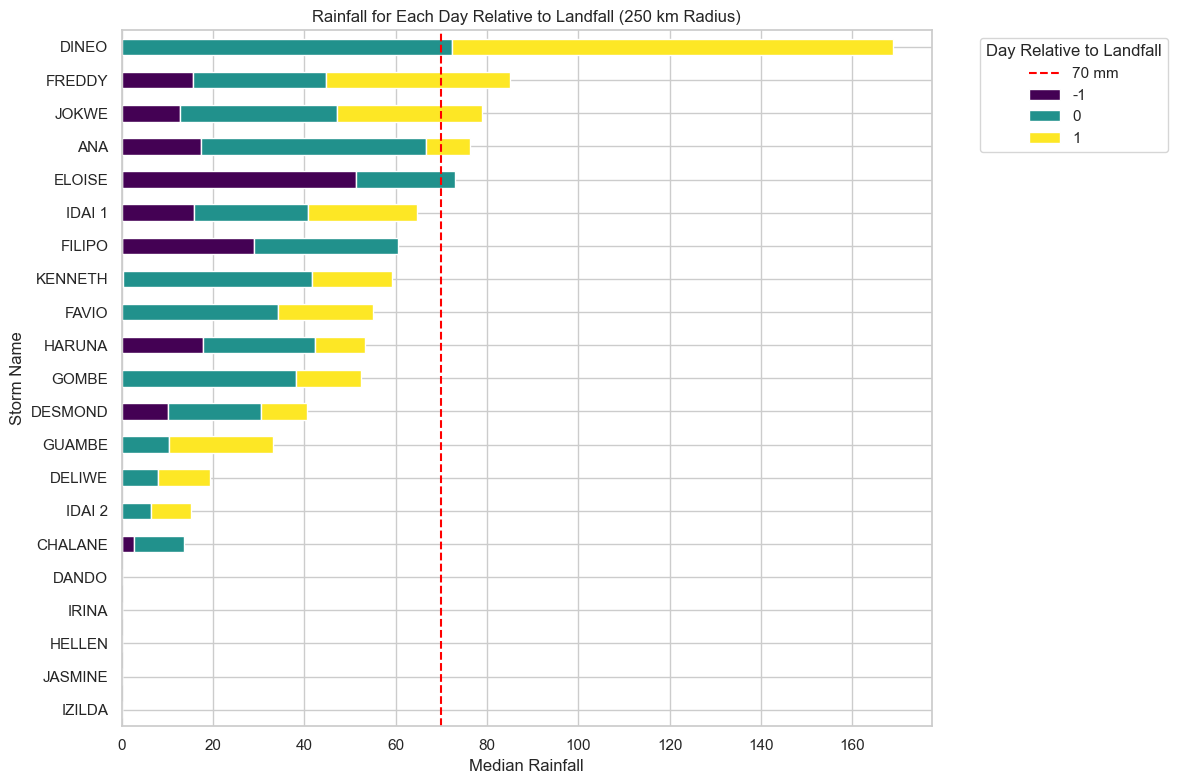

In [180]:
# Filter for specific time steps
df_time_steps = chirps_df[chirps_df["days_to_landfall"].isin([-1, 0, 1])]

# Filter for radius 250 km
df_filtered = df_time_steps

# Pivot the data for stacked bar plot
df_pivot = df_filtered.pivot_table(
    index="NAME",
    columns="days_to_landfall",
    values="median_rainfall",
    aggfunc="mean",
)
df_pivot.fillna(0, inplace=True)  # Replace NaNs with 0 for missing values

# Calculate total rainfall per storm
df_pivot["total_rainfall"] = df_pivot.sum(axis=1)

# Sort by total rainfall
df_sorted = df_pivot.sort_values(by="total_rainfall", ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Stack bars
df_sorted.drop(columns="total_rainfall").plot(
    kind="barh", stacked=True, ax=ax, colormap="viridis"
)
ax.axvline(x=70, color="red", linestyle="--", label="70 mm")
# Labels and title
ax.set_xlabel("Median Rainfall")
ax.set_ylabel("Storm Name")
ax.set_title("Rainfall for Each Day Relative to Landfall (250 km Radius)")

# Invert y-axis to display the highest values at the top
ax.invert_yaxis()

# Add legend
ax.legend(
    title="Day Relative to Landfall",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
)

# Show plot
plt.tight_layout()
plt.show()

In [202]:
# Create a mask for the specific value (e.g., "IDAI")
value_mask = chirps_df["NAME"] == "IDAI"

# Get the indices where this value appears
value_indices = chirps_df[value_mask].index

# Replace the first three occurrences
chirps_df.loc[value_indices[:3], "NAME"] = "IDAI 1"

# Replace the next three occurrences
chirps_df.loc[value_indices[3:6], "NAME"] = "IDAI 2"

chirps_sum_df = (
    chirps_df[chirps_df["days_to_landfall"].isin([-1, 0, 1])]
    .groupby("NAME", as_index=False)["median_rainfall"]
    .sum()
)
imerg_sum_df = (
    rain_df_250[rain_df_250["time_step"].isin([-1, 0, 1])]
    .groupby("storm", as_index=False)["median_precip"]
    .sum()
)

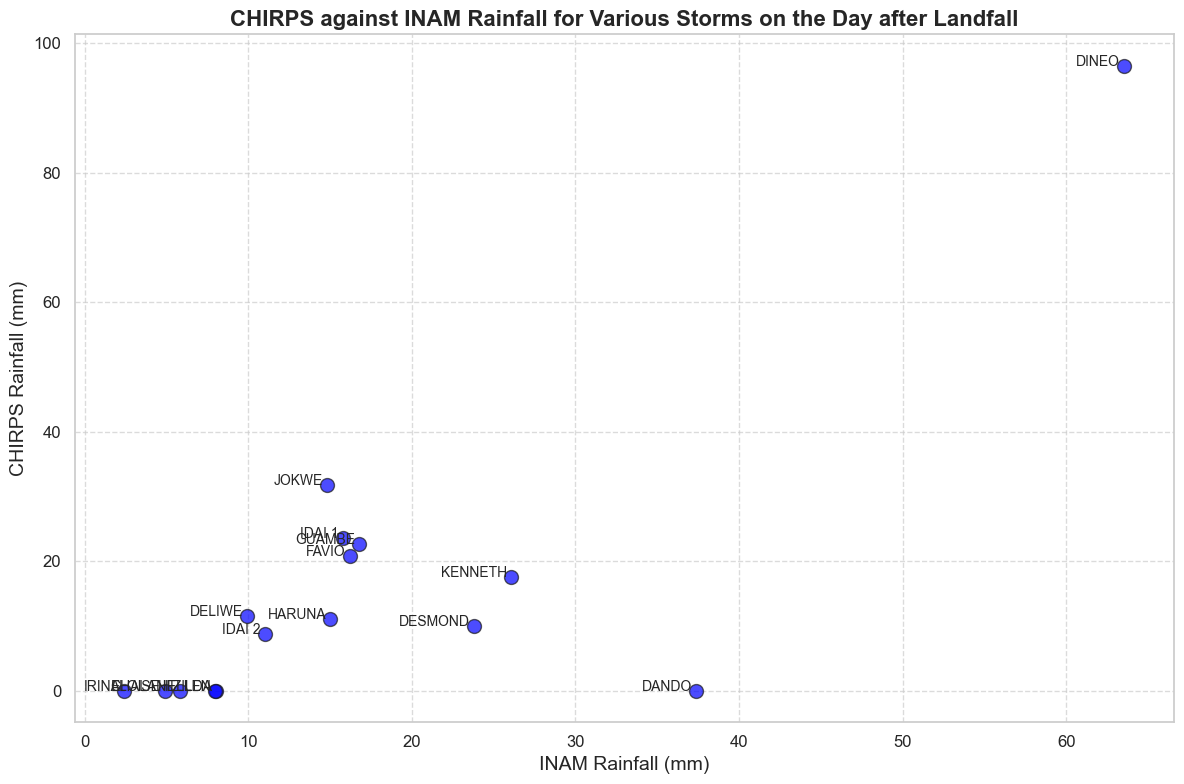

In [ ]:
# Merge data on storm names
df = pd.merge(
    inam_data, chirps_data, left_on="NAME", right_on="NAME", how="inner"
)

# Set up the plot with Seaborn
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Scatter plot with annotations
plt.scatter(
    df["median_rainfall_x"],
    df["median_rainfall_y"],
    color="blue",
    s=100,
    alpha=0.7,
    edgecolors="k",
)

# Annotate each point with the storm name
for i, row in df.iterrows():
    plt.text(
        row["median_rainfall_x"] - 0.25,
        row["median_rainfall_y"],
        row["NAME"],
        fontsize=10,
        ha="right",
    )

# Customizing the plot
plt.title(
    "CHIRPS against INAM Rainfall for Various Storms on the Day after Landfall",
    fontsize=16,
    fontweight="bold",
)
plt.xlabel("INAM Rainfall (mm)", fontsize=14)
plt.ylabel("CHIRPS Rainfall (mm)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

In [183]:
inam_data.sort_values(by="median_rainfall", ascending=False)

,Unnamed: 0,NAME,date,days_to_landfall,median_rainfall
42,42,DINEO,2017-02-16,1,63.5330
17,17,DANDO,2012-01-17,1,37.3720
62,62,KENNETH,2019-04-26,1,26.0490
47,47,DESMOND,2019-01-22,1,23.8010
77,77,GUAMBE,2021-02-13,1,16.7630
2,2,FAVIO,2007-02-23,1,16.2020
52,52,IDAI 1,2019-03-05,1,15.7810
27,27,HARUNA,2013-02-17,1,15.0305
7,7,JOKWE,2008-03-09,1,14.8320
57,57,IDAI 2,2019-03-15,1,11.0020


In [184]:
chirps_data.sort_values(by="median_rainfall", ascending=False)

,Unnamed: 0,NAME,date,days_to_landfall,median_rainfall
67,67,DINEO,2017-02-16,1,96.531450
156,156,FREDDY,2023-03-12,1,40.185455
11,11,JOKWE,2008-03-09,1,31.803915
83,83,IDAI 1,2019-03-05,1,23.671440
124,124,GUAMBE,2021-02-13,1,22.692438
3,3,FAVIO,2007-02-23,1,20.767479
98,98,KENNETH,2019-04-26,1,17.545930
140,140,GOMBE,2022-03-12,1,14.340758
51,51,DELIWE,2014-01-23,1,11.515707
43,43,HARUNA,2013-02-17,1,11.095266


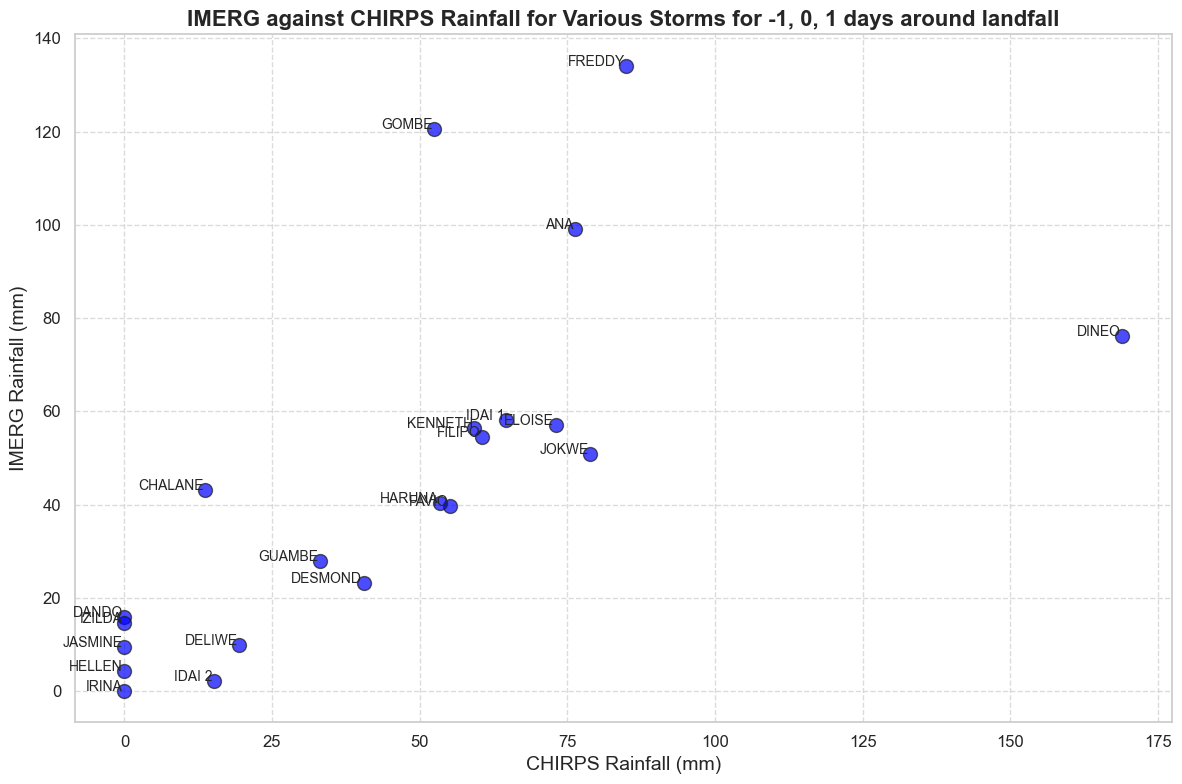

In [ ]:
# Merge data on storm names
df = pd.merge(
    chirps_sum_df, imerg_sum_df, left_on="NAME", right_on="storm", how="inner"
)

# Set up the plot with Seaborn
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Scatter plot with annotations
plt.scatter(
    df["median_rainfall"],
    df["median_precip"],
    color="blue",
    s=100,
    alpha=0.7,
    edgecolors="k",
)

# Annotate each point with the storm name
for i, row in df.iterrows():
    plt.text(
        row["median_rainfall"] - 0.25,
        row["median_precip"],
        row["storm"],
        fontsize=10,
        ha="right",
    )

# Customizing the plot
plt.title(
    "IMERG against CHIRPS Rainfall for Various Storms for -1, 0, 1 days around landfall",
    fontsize=16,
    fontweight="bold",
)
plt.xlabel("CHIRPS Rainfall (mm)", fontsize=14)
plt.ylabel("IMERG Rainfall (mm)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

In [ ]:
# Lists of storm events
# inam_storms = ["DINEO", "DANDO", "KENNETH", "DESMOND", "GUAMBE"]
chirps_storms = (
    pd.Series(
        chirps_data[chirps_data["median_rainfall"] > 22]["NAME"].unique()
    )
    .replace("IDAI 1", "IDAI")
    .to_list()
)
# obs_ws_storms = ["DINEO", "IDAI", "ELOISE", "FREDDY", "FILIPO"]
# obs_rain_storms = ["FAVIO", "ANA", "GOMBE", "FREDDY"]
df = storm_df.copy()
# Add the new columns for INAM and IMERG observation rain
df["INAM OBS RAIN"] = df["storm"].apply(lambda x: x in inam_storms)
df["CHIRPS OBS RAIN"] = df["storm"].apply(lambda x: x in chirps_storms)
df = df[
    [
        "storm",
        "INAM OBS RAIN",
        "CHIRPS OBS RAIN",
        "Total Affected",
        "CERF Allocations (USD)",
    ]
]

# Sort the DataFrame by 'Total Affected' in descending order
# Round values in 'Total Affected' and 'CERF Allocations' columns
df_sorted = df.sort_values(by="Total Affected", ascending=False)

# Apply styling
styled_df = (
    df_sorted.style.map(
        highlight_true,
        subset=[
            "INAM OBS RAIN",
            "CHIRPS OBS RAIN",
            # "Observational Rainfall",
        ],
    )
    .map(color_bar_affected, subset=["Total Affected"])
    .map(color_bar_cerf, subset=["CERF Allocations (USD)"])
    .format(
        {
            "Total Affected": lambda x: (
                f"{int(x):,}" if pd.notna(x) else ""
            ),  # Format with commas, no decimals, NaN as blank
            "CERF Allocations (USD)": lambda x: (
                f"{int(x):,}" if pd.notna(x) else ""
            ),  # Format with commas, no decimals, NaN as blank
        }
    )
    .set_table_styles(
        {"": [{"selector": "table", "props": "background-color: white;"}]}
    )
)

# Display the styled DataFrame
styled_df

,storm,INAM OBS RAIN,CHIRPS OBS RAIN,Total Affected,CERF Allocations (USD)
12,IDAI,False,True,"1,628,167","14,018,121"
20,FREDDY,False,True,"1,143,569","9,995,213"
10,DINEO,True,True,"750,102","2,000,095"
18,GOMBE,False,False,"736,015","4,018,682"
15,ELOISE,False,False,"481,901",
13,KENNETH,True,False,"400,094","9,964,907"
1,JOKWE,False,True,"220,013","548,913"
17,ANA,False,False,"185,429",
0,FAVIO,False,False,"162,770","1,070,014"
14,CHALANE,False,False,"73,254",


In [ ]:
# Lists of storm events
imerg_storms = (
    pd.Series(
        imerg_sum_df[imerg_sum_df["median_precip"] > 55]["storm"].unique()
    )
    .replace("IDAI 1", "IDAI")
    .to_list()
)
chirps_storms = (
    pd.Series(
        chirps_sum_df[chirps_sum_df["median_rainfall"] > 55]["NAME"].unique()
    )
    .replace("IDAI 1", "IDAI")
    .to_list()
)
# obs_ws_storms = ["DINEO", "IDAI", "ELOISE", "FREDDY", "FILIPO"]
# obs_rain_storms = ["FAVIO", "ANA", "GOMBE", "FREDDY"]
df = storm_df.copy()
# Add the new columns for INAM and IMERG observation rain
df["IMERG OBS RAIN"] = df["storm"].apply(lambda x: x in imerg_storms)
df["CHIRPS OBS RAIN"] = df["storm"].apply(lambda x: x in chirps_storms)
df = df[
    [
        "storm",
        "IMERG OBS RAIN",
        "CHIRPS OBS RAIN",
        "Total Affected",
        "CERF Allocations (USD)",
    ]
]

# Sort the DataFrame by 'Total Affected' in descending order
# Round values in 'Total Affected' and 'CERF Allocations' columns
df_sorted = df.sort_values(by="Total Affected", ascending=False)

# Apply styling
styled_df = (
    df_sorted.style.map(
        highlight_true,
        subset=[
            "IMERG OBS RAIN",
            "CHIRPS OBS RAIN",
            # "Observational Rainfall",
        ],
    )
    .map(color_bar_affected, subset=["Total Affected"])
    .map(color_bar_cerf, subset=["CERF Allocations (USD)"])
    .format(
        {
            "Total Affected": lambda x: (
                f"{int(x):,}" if pd.notna(x) else ""
            ),  # Format with commas, no decimals, NaN as blank
            "CERF Allocations (USD)": lambda x: (
                f"{int(x):,}" if pd.notna(x) else ""
            ),  # Format with commas, no decimals, NaN as blank
        }
    )
    .set_table_styles(
        {"": [{"selector": "table", "props": "background-color: white;"}]}
    )
)

# Display the styled DataFrame
styled_df

,storm,IMERG OBS RAIN,CHIRPS OBS RAIN,Total Affected,CERF Allocations (USD)
12,IDAI,True,True,"1,628,167","14,018,121"
20,FREDDY,True,True,"1,143,569","9,995,213"
10,DINEO,True,True,"750,102","2,000,095"
18,GOMBE,True,False,"736,015","4,018,682"
15,ELOISE,True,True,"481,901",
13,KENNETH,True,True,"400,094","9,964,907"
1,JOKWE,False,True,"220,013","548,913"
17,ANA,True,True,"185,429",
0,FAVIO,False,True,"162,770","1,070,014"
14,CHALANE,False,False,"73,254",
